In [ ]:
!pip install scikit-plot

##UTILITIES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from collections import defaultdict
from yellowbrick.contrib.classifier import DecisionViz
from sklearn.decomposition import PCA
from itertools import product
from imblearn.datasets import make_imbalance
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from yellowbrick.datasets import load_credit
from yellowbrick.features import PCA as yPCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from scikitplot.metrics import plot_precision_recall, plot_roc, plot_cumulative_gain, plot_lift_curve
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import KFold
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, classification_report

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.model_selection import GridSearchCV

In [ ]:
def print_confMatrix(y_test,y_test_pred):
    cm=confusion_matrix(y_test, y_test_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Greens")
    plt.show()

In [ ]:
df_train=pd.read_csv("ravdess_train.csv")
df_test=pd.read_csv("Ravdess_test.csv")

In [ ]:
df_train

,Vocal_channel_,Emotion,Emotional_intensity,Statement,Repetition,Sex,mean,q50,q75,kur,...,sc_q99_w4,sc_kur_w4,sc_skew_w4,stft_sum_w4,stft_q05_w4,stft_q75_w4,stft_q95_w4,stft_kur_w4,stft_skew_w4,actor
0,1,5,0,1,0,1,0.018034,-0.063106,-0.76930,0.553248,...,1.332275,11.020083,-4.354785,0.161158,2.167997,0.690192,0.036057,9.400360,-3.035005,1
1,1,5,0,1,1,1,0.013950,-0.063106,-0.76930,0.770118,...,1.315989,-0.107613,-0.659640,-0.173413,1.610931,0.409754,0.036057,-0.186504,0.434538,1
2,1,5,0,0,0,1,0.018855,-0.063106,-0.76930,0.851346,...,1.369021,7.023345,-3.086640,-0.286208,1.285119,0.722854,0.036057,2.891302,-1.463754,1
3,1,5,0,0,1,1,0.018087,-0.063106,-0.76930,1.562804,...,1.206493,-0.211628,-0.396009,-0.588962,1.176485,0.560400,0.036057,-0.049566,-0.052845,1
4,1,1,0,1,0,1,0.015921,-0.063106,-0.76930,0.286970,...,1.361250,-0.040910,-0.624456,0.170902,1.346235,0.452031,0.036057,0.878701,-0.532241,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1823,1,7,0,0,1,0,-0.019175,-0.063106,-0.74864,-0.713004,...,1.296552,0.333745,-1.106246,-0.612427,-1.198817,0.647428,0.036057,1.054354,-1.526104,18
1824,1,7,1,1,0,0,-0.016770,-0.063106,-0.74864,-0.237333,...,1.376251,0.352433,-0.901054,-0.871550,-1.198817,0.734806,0.036057,-0.389173,-0.504115,18
1825,1,7,1,1,1,0,-0.025751,-0.063106,-0.74864,-0.806583,...,1.421183,1.039254,-1.106898,-0.894085,-0.618677,0.624605,0.036057,-0.130100,-0.454243,18
1826,1,7,1,0,0,0,-0.009914,-0.063106,-0.70732,-1.013416,...,1.305472,-0.074024,-0.732249,-0.424644,-1.198817,0.343780,0.036057,0.072917,-1.058564,18


In [ ]:
df_test_new=df_test.drop("Unnamed: 0", axis=1, inplace=True)
#La funzione drop() è utilizzata per rimuovere una o più colonne (o righe) da un dataframe.
#Nel caso specifico, la colonna "Unnamed: 0" viene rimossa dal dataframe df_test.
#L'opzione axis=1 indica che la colonna deve essere rimossa e non una riga, mentre l'opzione
#inplace=True indica che la modifica deve essere effettuata direttamente sul dataframe df_test,
#senza creare un nuovo dataframe. Il risultato del comando viene assegnato alla variabile df_test_new,
#ma in realtà questa variabile non è necessaria in quanto il dataframe originale df_test è stato modificato direttamente.

In [ ]:
df_test

,Vocal_channel_,Emotion,Emotional_intensity,Statement,Repetition,Sex,mean,q50,q75,kur,...,sc_q99_w4,sc_kur_w4,sc_skew_w4,stft_sum_w4,stft_q05_w4,stft_q75_w4,stft_q95_w4,stft_kur_w4,stft_skew_w4,actor
0,1,5,0,1,0,1,0.471300,0.040064,-0.739874,0.077772,...,0.713432,-0.190379,0.251836,-0.162595,1.952153,1.254304,0.049581,0.652919,-0.493238,19
1,1,5,0,1,1,1,0.126584,0.040064,-0.739874,0.434766,...,0.859202,-0.618751,0.361906,-1.207090,0.699988,0.545470,0.049581,0.350178,-0.551086,19
2,1,5,0,0,0,1,-0.591735,0.040064,-0.785476,-0.516932,...,0.964382,-0.268520,0.616067,-0.799392,0.874587,0.940008,0.049581,2.245793,-1.380431,19
3,1,5,0,0,1,1,-0.077100,0.040064,-0.762675,0.577221,...,0.512538,-0.474050,1.146812,-0.431005,1.740569,1.191764,0.049581,-0.361240,0.018907,19
4,1,1,0,1,0,1,0.141006,0.040064,-0.762675,-0.314121,...,0.783936,1.144458,-1.285417,0.456053,1.462546,1.232346,0.049581,0.156689,-0.439458,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619,0,3,0,0,1,0,0.310354,0.040064,-0.283859,-0.702275,...,-0.782914,-0.112144,-0.762158,0.589910,-1.073992,-0.015243,0.049581,0.230264,-0.995984,24
620,0,3,1,1,0,0,-1.001327,0.040064,-0.101452,0.589876,...,-0.826903,-0.100709,1.306729,-0.616468,-1.103223,-1.388961,0.049581,-0.455872,0.666612,24
621,0,3,1,1,1,0,0.445345,0.040064,-0.078652,-0.633855,...,-1.280200,-0.269630,0.169706,-1.416799,-1.064193,-1.818966,0.049581,-0.671121,1.085149,24
622,0,3,1,0,0,0,0.623436,0.040064,-0.124253,-0.768437,...,-1.340317,-0.316858,0.328066,-0.312474,-0.724931,-0.636175,0.049581,-0.083593,0.182546,24


In [ ]:
attributes1=[col for col in df_train.columns if col !="Emotion"]
#la prima riga crea una lista attributes1 contenente i nomi di tutte le colonne del dataframe df_train
#che non corrispondono alla colonna "Vocal_channel_". In altre parole, vengono selezionate tutte le colonne che rappresentano le caratteristiche o feature degli esempi.
attributes2=[col for col in df_test.columns if col !="Emotion"]
#La seconda riga crea una lista attributes2 con lo stesso principio della prima, ma questa volta per il dataframe di test df_test_new.
X_train=df_train[attributes1].values
#La terza riga seleziona i valori di tutte le colonne elencate nella lista attributes1 del dataframe di train e li assegna alla variabile X_train.
y_train=np.array(df_train["Emotion"])
#La quarta riga seleziona i valori di tutte le colonne elencate nella lista attributes2 del dataframe di test e li assegna alla variabile X_test.
X_test=df_test[attributes2].values
#La quinta riga seleziona i valori della colonna "Vocal_channel_" del dataframe di train e li assegna alla variabile y_train.
y_test=np.array(df_test["Emotion"])
#La sesta riga seleziona i valori della colonna "Vocal_channel_" del dataframe di test e li assegna alla variabile y_test.

X_train.shape, y_train.shape, X_test.shape, y_test.shape
#L'ultima riga restituisce le dimensioni di X_train, y_train, X_test e y_test.

# il codice seleziona le feature e le etichette (o target) dal dataframe di train e dal dataframe di test, in modo da creare un insieme di dati di training
#e un insieme di dati di test, che possono essere utilizzati per addestrare e valutare un modello di apprendimento automatico.

((1828, 162), (1828,), (624, 162), (624,))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

def plot_res(y_pred, y_score, y_test):
    #ROC CURVE: implementazione legata esclusivamente all'attività di classificazione binaria
    #false positive rate, true positive rate
    print("****** ROC CURVE + AUC?: passo passo *******")


    # Genera alcuni dati di esempio per tre classi
    n_classes = 8


    # Binariaza le etichette
    y_true_bin = label_binarize(y_test, classes=np.arange(n_classes))

    # Calcola la curva ROC aggregata
    fpr, tpr, _ = roc_curve(y_true_bin.ravel(), y_score.ravel())
    roc_auc = auc(fpr, tpr)

    # Plotta la curva ROC
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2,
            label='Curva ROC (AUC = {0:0.2f})'
            ''.format(roc_auc))

    plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Linea di riferimento diagonale
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Tasso di falsi positivi')
    plt.ylabel('Tasso di veri positivi')
    plt.title('Curva ROC per la classificazione multi-classe')
    plt.legend(loc="lower right")
    plt.show()

    print("____________________________________")
    print("****** VALORE DI AUC *******")
    print("____________________________________")
    print("****** VALORE DI AUC *******")
    micro_roc_auc_ovr = roc_auc_score(
        y_test,
        y_score,
        multi_class="ovr",
        average="micro",
)

    print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{micro_roc_auc_ovr:.2f}")

    print("____________________________________")
    print("****** ROC CURVE: con metodo diretto *******")
    plot_roc(y_test, y_score)
    plt.show()

    print("____________________________________")
    print("****** Precision recall: con metodo diretto *******")
    plot_precision_recall(y_test, y_score)
    plt.show()


In [ ]:
def result_pred(y_true, y_pred):
    print("**** Matrice di Confusione *****")
    # Calcola la matrice di confusione
    confusion_mat = confusion_matrix(y_true, y_pred)

    # Plotta la matrice di confusione
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues")
    plt.title("Matrice di confusione")
    plt.xlabel("Etichetta predetta")
    plt.ylabel("Etichetta vera")
    plt.show()


    # Calcolo dell'accuracy
    print("***** Calcolo dell'accuracy *****")
    accuracy = accuracy_score(y_true, y_pred)
    print('Accuracy: %0.4f' % accuracy)
    print("____________________________________________")

    # Calcolo della precision
    print("**** Calcolo della precisione *****")
    #Percentuale di classificazioni positive che sono corrette
    #se dico "positivo" dico giusto?
    precision = precision_score(y_true, y_pred, average ="macro")
    print('Percentuale di classificazioni positive che sono corrette: %0.4f' % precision)
    print("____________________________________________")

    # Calcolo della recall
    print("**** Calcolo della recall (sensitivity) *****")
    recall = recall_score(y_true, y_pred, average="macro")
    print('Percentuale di elementi positivi del testing set che sono stati classificati come positivi: %0.4f' % recall)
    print("____________________________________________")

    # Calcolo della specificity
    print("**** Calcolo della specificity *****")
   # Calcola la matrice di confusione
    confusion_mat = confusion_matrix(y_true, y_pred)

    # Calcola la specificità per ciascuna classe
    specificity_scores = []
    for i in range(n_classes):
        tn = np.sum(np.delete(np.delete(confusion_mat, i, axis=0), i, axis=1))
        fp_fn = np.sum(np.delete(confusion_mat, i, axis=0)[:, i]) + np.sum(confusion_mat[i, np.arange(n_classes) != i])
        specificity = tn / (tn + fp_fn)
        specificity_scores.append(specificity)

    # Stampa la specificità per ciascuna classe
    print("Specificità per classe:")
    for i, specificity in enumerate(specificity_scores):
        print("Classe {}: {:.2f}".format(i, specificity))
        print('Percentuale di elementi negativi del testing set che sono stati classificati come negativi: %0.4f' % specificity)
        print("-----")

    # Calcolo dell'F1 score
    print("**** Calcolo della F1 score *****")
    f1 = f1_score(y_true, y_pred, average="macro")
    #Il punteggio F1 può essere interpretato come una media ponderata della precisione e della recall,
    #in cui un punteggio F1 raggiunge il suo valore migliore a 1 e il punteggio peggiore a 0.
    print('F1 scores: %0.4f' % f1)
    print("____________________________________________")

    # Stampiamo le stesse statistiche dalla funzione report
    print(classification_report(y_test, y_pred))

    print("Con le tecniche viste finora non viene fornita nessuna informazione sulla “gravità” degli errori (“errore lieve” oppure “errore grave)")
    print("per questo si usano la curva CMC, la curva ROC")

In [ ]:
def plt_single_perceptron(name_csv, pnl):
    df = pd.read_csv(name_csv)
    fig = plt.figure(figsize=(16,8))
    fig.canvas.manager.full_screen_toggle()

    fig.suptitle('Single Perceptron', fontsize=15, fontweight='bold')
    penalty = pnl
    df = df.loc[(df.penalty == penalty)][['f1','std_dev', 'alpha','tol']]
    pivot = df.pivot('alpha','tol', 'f1')
    labels = pivot.as_matrix().astype(str)

    x = 0
    for i in range(0, pivot.shape[0]):
        for j in range(0, pivot.shape[1]):
            labels[i,j] = str(labels[i,j])[:5] + "\n+/- " + "{0:.3f}".format(df['std_dev'].iloc[x])
            x += 1

    sns.heatmap(pivot, cmap="YlGnBu", annot=labels, fmt="", cbar=False, square=True, linewidths=.5, cbar_kws={"shrink": .5})

    plt.show()

Le righe di codice che hai fornito creano un training set e un test set, prendendo come input i dati originali contenuti nei dataframe df_train e df_test_new

##SKLEARN MULTILAYER PERCEPTRON

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [ ]:
hidden_layer_sizes = (100,200,)

Il codice hidden_layer_sizes = (100, 200,) definisce una tupla di dimensioni (100, 200) che rappresenta il numero di neuroni presenti in ciascuno strato nascosto di una rete neurale. In particolare, la tupla indica che la rete neurale ha due strati nascosti, uno con 100 neuroni e uno con 200 neuroni.

Le reti neurali sono composte da una serie di strati di neuroni, in cui ogni neurone è connesso a tutti gli altri neuroni dello strato precedente e di quello successivo. Ogni strato di neuroni può avere un numero variabile di neuroni, che dipende dal problema specifico e dalla complessità della funzione da apprendere.
Nella tupla (100, 200,) i numeri indicano il numero di neuroni nei rispettivi strati nascosti. Ad esempio, la tupla (50, 30, 20,) indica che la rete neurale ha tre strati nascosti, rispettivamente con 50, 30 e 20 neuroni.

La scelta del numero di strati e di neuroni in ciascuno strato è un aspetto fondamentale nella progettazione delle reti neurali, poiché ha un impatto significativo sulle prestazioni e sulla capacità di generalizzazione del modello.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Best parameters set found on development set:

{'activation': 'relu', 'early_stopping': False, 'hidden_layer_sizes': (128, 64, 32), 'learning_rate': 'adaptive', 'tol': 0.0001}

Grid scores on development set:

0.215 (+/-0.094) for {'activation': 'logistic', 'early_stopping': True, 'hidden_layer_sizes': (12, 23, 11), 'learning_rate': 'constant', 'tol': 0.01}
0.261 (+/-0.152) for {'activation': 'logistic', 'early_stopping': True, 'hidden_layer_sizes': (12, 23, 11), 'learning_rate': 'constant', 'tol': 0.001}
0.206 (+/-0.130) for {'activation': 'logistic', 'early_stopping': True, 'hidden_layer_sizes': (12, 23, 11), 'learning_rate': 'constant', 'tol': 0.0001}
0.217 (+/-0.105) for {'activation': 'logistic', 'early_stopping': True, 'hidden_layer_sizes': (12, 23, 11), 'learning_rate': 'invscaling', 'tol': 0.01}
0.239 (+/-0.129) for {'activation': 'logistic', 'early_stopping': True, 'hidden_layer_sizes': (12, 23, 11), 'learning_rate': 'invscaling', 'tol': 0.001}
0.187 (+/-0.086) for {'activatio

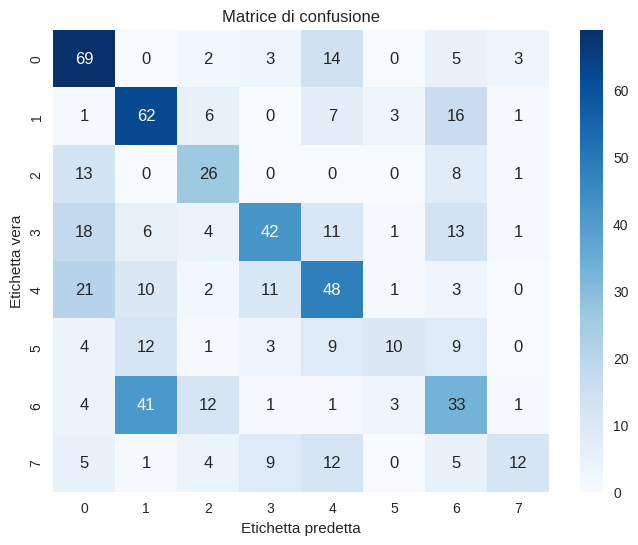

***** Calcolo dell'accuracy *****
Accuracy: 0.4840
____________________________________________
**** Calcolo della precisione *****
Percentuale di classificazioni positive che sono corrette: 0.5078
____________________________________________
**** Calcolo della recall (sensitivity) *****
Percentuale di elementi positivi del testing set che sono stati classificati come positivi: 0.4557
____________________________________________
**** Calcolo della specificity *****


IndexError: ignored

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

k_fold = StratifiedKFold(n_splits=4)


# Definizione dei parametri da testare
parameters = {
    'hidden_layer_sizes': [(12, 23, 11), (23, 43, 32), (128, 64, 32)],
    'activation': ['logistic', 'relu'],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'tol': [1e-2, 1e-3, 1e-4],

    #'alpha': 10.0 ** -np.arange(1, 7),
    'early_stopping': [True, False]
}

# Creazione dell'oggetto della rete neurale
neural_net = MLPClassifier()

# Creazione dell'oggetto GridSearchCV
grid_search = GridSearchCV(neural_net, parameters, cv=5)

# Addestramento della rete neurale con la grid search
grid_search.fit(X_train, y_train)

# Stampare i risultati
print("Best parameters set found on development set:")
print()
print(grid_search.best_params_)
print()
print("Grid scores on development set:")
print()
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid_search.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()

# Valutazione finale del modello
print("Best score achieved: %0.3f" % grid_search.best_score_)
print()
print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = y_test, grid_search.predict(X_test)
result_pred(y_test, y_pred)
y_score = clf.predict_proba(X_test)
plot_res(y_pred, y_score, y_test)


{'activation': 'relu', 'early_stopping': False, 'hidden_layer_sizes': (128, 64, 32), 'learning_rate': 'adaptive', 'tol': 0.0001}


****** ROC CURVE + AUC?: passo passo *******


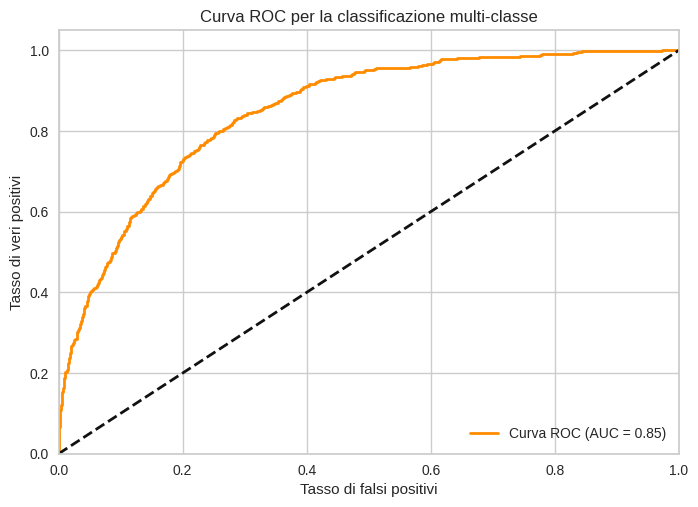

____________________________________
****** VALORE DI AUC *******
____________________________________
****** VALORE DI AUC *******
Micro-averaged One-vs-Rest ROC AUC score:
0.85
____________________________________
****** ROC CURVE: con metodo diretto *******


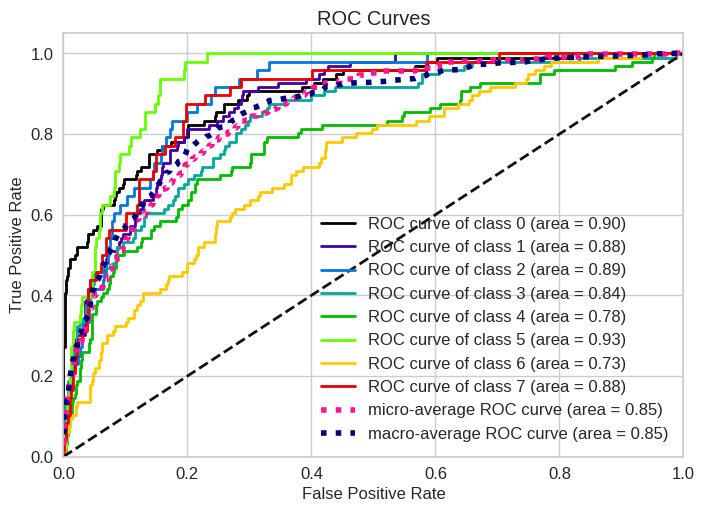

____________________________________
****** Precision recall: con metodo diretto *******


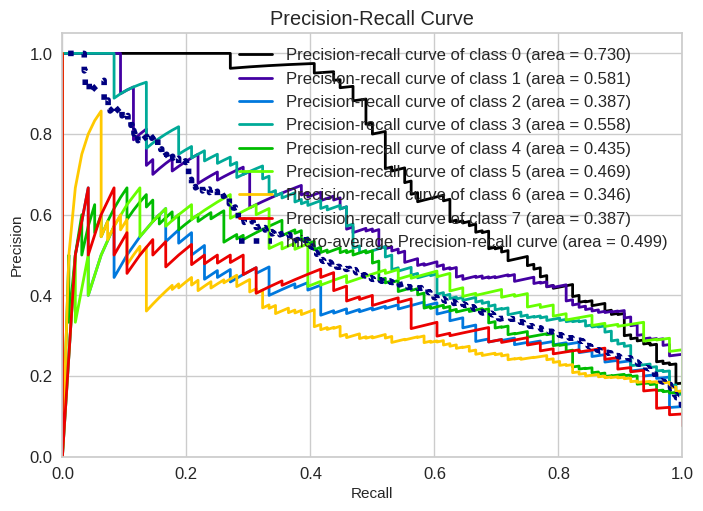

In [ ]:
clf = MLPClassifier(solver = 'adam', momentum = 0.9, learning_rate = 'adaptive' , hidden_layer_sizes=(128, 64, 32),early_stopping= False, activation= "relu")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_score = clf.predict_proba(X_test)
plot_res(y_pred, y_score, y_test)




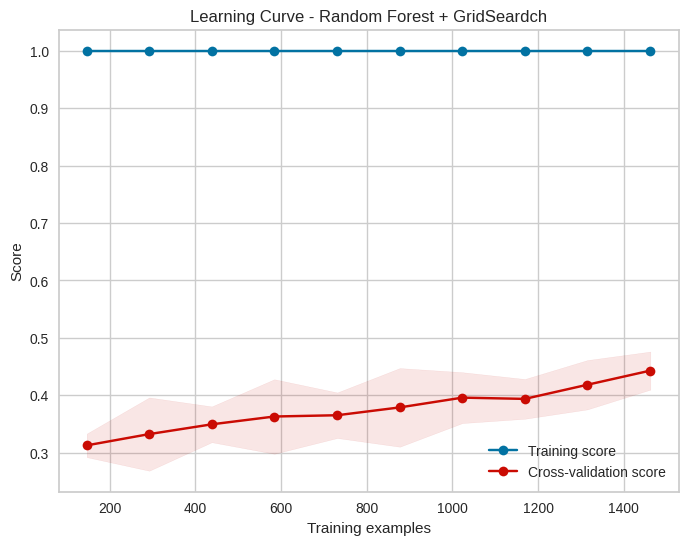

In [ ]:
#PLOT LEARNING CURVE

from sklearn.model_selection import learning_curve
# Calcola la learning curve
train_sizes, train_scores, test_scores = learning_curve(
    clf, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

# Calcola le medie e gli errori standard delle prestazioni
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plotta la learning curve
plt.figure(figsize=(8, 6))
plt.title('Learning Curve - Random Forest + GridSeardch')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.grid(True)
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color='b')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1,
                 color='r')
plt.plot(train_sizes, train_scores_mean, 'o-', color='b',
         label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='r',
         label='Cross-validation score')
plt.legend(loc='best')
plt.show()

In [ ]:
clf1 = MLPClassifier(solver = 'adam', momentum = 0.9, learning_rate = 'adaptive' , hidden_layer_sizes=(128, 64, 32),early_stopping= False, activation= "relu")
#-hidden_layer_sizes=(128, 64, 32,) definisce la struttura della rete neurale artificiale: in questo caso,
#si tratta di una rete a tre strati, con il primo strato contenente 128 neuroni, il secondo strato contenente 64 neuroni e il terzo strato contenente 32 neuroni.
#-alpha=0.1 specifica la regolarizzazione L2, che viene utilizzata per prevenire l'overfitting dei dati di addestramento
#-learning_rate='adaptive' indica che la dimensione del passo di apprendimento deve essere adattata automaticamente in base alla convergenza del modello.
#-activation='tanh' specifica la funzione di attivazione del neurone, che viene utilizzata per introdurre non-linearità nella rete neurale.
#-early_stopping=True utilizza la tecnica di early stopping, ovvero interrompe l'addestramento del modello quando la performance sul set di validazione smette di migliorare.
#-momentum=0.9 indica il valore del momentum, che viene utilizzato per aggiornare i pesi del modello in modo da evitare minimi locali durante l'addestramento.
#-random_state=0 imposta il seed per la generazione di numeri casuali, in modo da rendere riproducibili i risultati.

clf1.fit(X_train, y_train)

y_pred=clf1.predict(X_test)
#Le righe successive addestrano il modello sulla base dei dati di addestramento X_train e y_train, utilizzando il metodo fit della classe MLPClassifier.
#Successivamente, il modello viene utilizzato per effettuare la predizione sui dati di test X_test utilizzando il metodo predict, e le predizioni risultanti vengono assegnate alla variabile y_pred

print("Accuracy %s", accuracy_score(y_test, y_pred))
print("F1-score %s", f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy %s 0.4567307692307692
F1-score %s [0.58653846 0.47887324 0.42477876 0.50515464 0.47567568 0.23529412
 0.36458333 0.34666667]
              precision    recall  f1-score   support

           0       0.54      0.64      0.59        96
           1       0.44      0.53      0.48        96
           2       0.37      0.50      0.42        48
           3       0.50      0.51      0.51        96
           4       0.49      0.46      0.48        96
           5       0.40      0.17      0.24        48
           6       0.36      0.36      0.36        96
           7       0.48      0.27      0.35        48

    accuracy                           0.46       624
   macro avg       0.45      0.43      0.43       624
weighted avg       0.46      0.46      0.45       624



Questo codice crea un'istanza della classe MLPClassifier dal modulo sklearn.neural_network e addestra il modello utilizzando i dati di addestramento X_train e y_train. In particolare, MLPClassifier è un algoritmo di rete neurale artificiale con struttura multistrato, che utilizza la retropropagazione per apprendere dai dati.

Dopo l'addestramento, il modello viene utilizzato per effettuare la predizione sui dati di test X_test utilizzando il metodo predict, e le predizioni risultanti vengono assegnate alla variabile y_pred. In altre parole, si sta usando la rete neurale artificiale addestrata per fare delle previsioni sui dati di test.

La classe MLPClassifier offre diverse opzioni per personalizzare il modello, come ad esempio il numero di strati, il numero di neuroni per strato, la funzione di attivazione, il solver per l'ottimizzazione, la regolarizzazione, e molte altre opzioni.

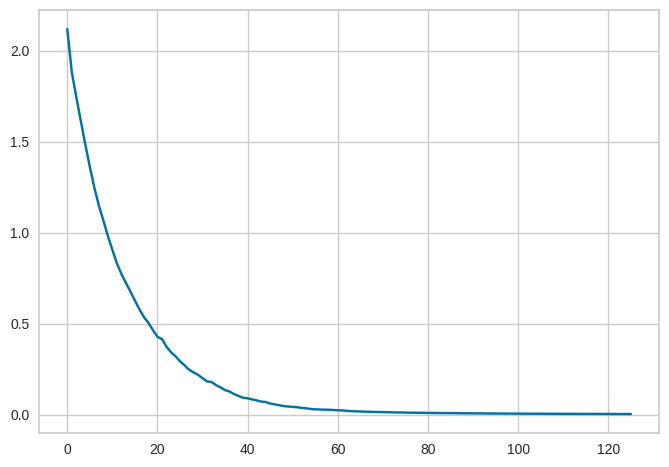

In [ ]:
plt.plot(clf1.loss_curve_)
plt.show()

****** ROC CURVE + AUC?: passo passo *******


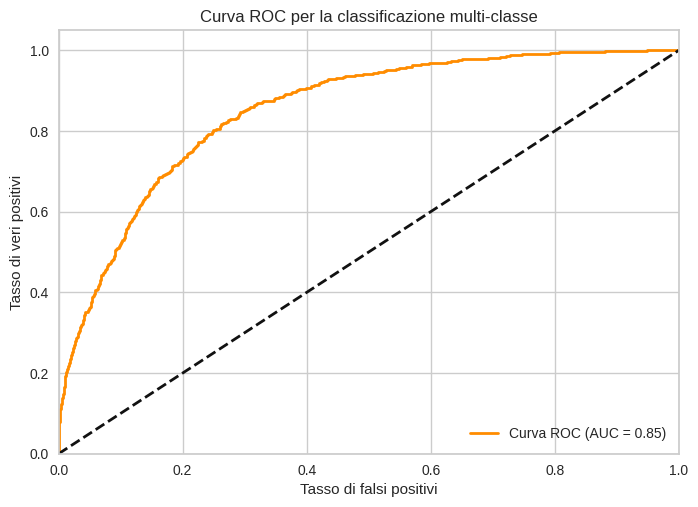

____________________________________
****** VALORE DI AUC *******
____________________________________
****** VALORE DI AUC *******
Micro-averaged One-vs-Rest ROC AUC score:
0.85
____________________________________
****** ROC CURVE: con metodo diretto *******


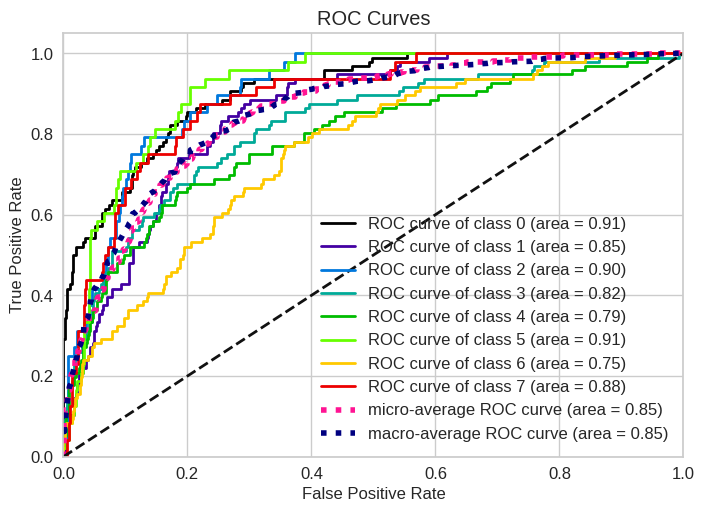

____________________________________
****** Precision recall: con metodo diretto *******


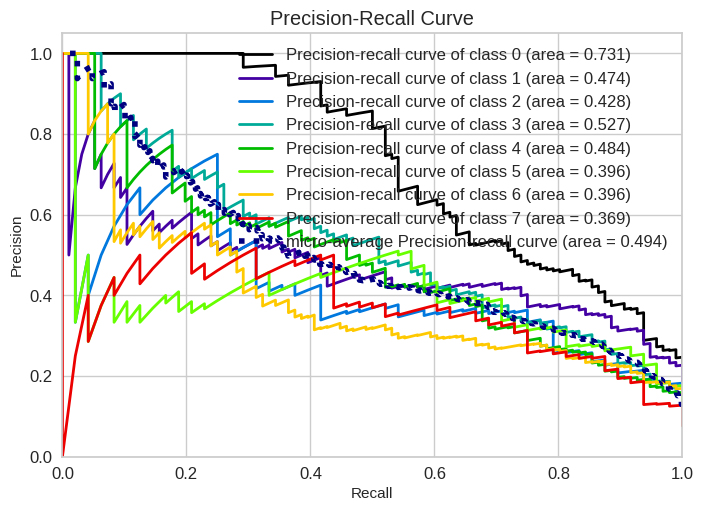

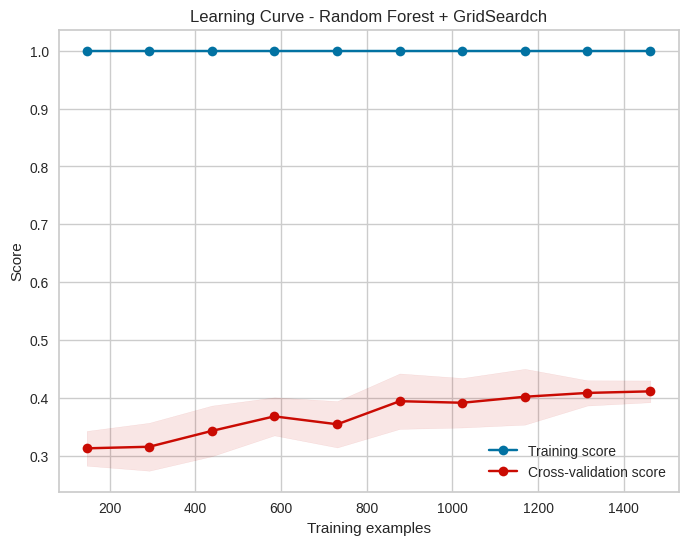

In [ ]:
#PLOT ROC

y_score = clf1.predict_proba(X_test)
plot_res(y_pred, y_score, y_test)

#PLOT LEARNING CURVE

from sklearn.model_selection import learning_curve
# Calcola la learning curve
train_sizes, train_scores, test_scores = learning_curve(
    clf1, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

# Calcola le medie e gli errori standard delle prestazioni
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plotta la learning curve
plt.figure(figsize=(8, 6))
plt.title('Learning Curve - Random Forest + GridSeardch')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.grid(True)
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color='b')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1,
                 color='r')
plt.plot(train_sizes, train_scores_mean, 'o-', color='b',
         label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='r',
         label='Cross-validation score')
plt.legend(loc='best')
plt.show()

In [ ]:
clf2 = MLPClassifier(hidden_layer_sizes=(128, 64, 32,), alpha=0.1, learning_rate='adaptive',
                    activation='tanh', early_stopping=True, momentum=0.9, random_state=0)
#-hidden_layer_sizes=(128, 64, 32,) definisce la struttura della rete neurale artificiale: in questo caso,
#si tratta di una rete a tre strati, con il primo strato contenente 128 neuroni, il secondo strato contenente 64 neuroni e il terzo strato contenente 32 neuroni.
#-alpha=0.1 specifica la regolarizzazione L2, che viene utilizzata per prevenire l'overfitting dei dati di addestramento
#-learning_rate='adaptive' indica che la dimensione del passo di apprendimento deve essere adattata automaticamente in base alla convergenza del modello.
#-activation='tanh' specifica la funzione di attivazione del neurone, che viene utilizzata per introdurre non-linearità nella rete neurale.
#-early_stopping=True utilizza la tecnica di early stopping, ovvero interrompe l'addestramento del modello quando la performance sul set di validazione smette di migliorare.
#-momentum=0.9 indica il valore del momentum, che viene utilizzato per aggiornare i pesi del modello in modo da evitare minimi locali durante l'addestramento.
#-random_state=0 imposta il seed per la generazione di numeri casuali, in modo da rendere riproducibili i risultati.

clf2.fit(X_train, y_train)

y_pred=clf2.predict(X_test)
#Le righe successive addestrano il modello sulla base dei dati di addestramento X_train e y_train, utilizzando il metodo fit della classe MLPClassifier.
#Successivamente, il modello viene utilizzato per effettuare la predizione sui dati di test X_test utilizzando il metodo predict, e le predizioni risultanti vengono assegnate alla variabile y_pred

print("Accuracy %s", accuracy_score(y_test, y_pred))
print("F1-score %s", f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

#L'accuracy, ovvero la percentuale di predizioni corrette, calcolata utilizzando la funzione accuracy_score della libreria sklearn.metrics.
#L'F1-score, ovvero una metrica di valutazione del modello che tiene conto di precisione e recall per ogni classe, calcolata utilizzando la funzione f1_score della libreria sklearn.metrics.

Accuracy %s 0.4342948717948718
F1-score %s [0.54074074 0.49473684 0.46666667 0.41618497 0.33519553 0.25396825
 0.47058824 0.20253165]
              precision    recall  f1-score   support

           0       0.42      0.76      0.54        96
           1       0.50      0.49      0.49        96
           2       0.50      0.44      0.47        48
           3       0.47      0.38      0.42        96
           4       0.36      0.31      0.34        96
           5       0.53      0.17      0.25        48
           6       0.44      0.50      0.47        96
           7       0.26      0.17      0.20        48

    accuracy                           0.43       624
   macro avg       0.44      0.40      0.40       624
weighted avg       0.44      0.43      0.42       624



****** ROC CURVE + AUC?: passo passo *******


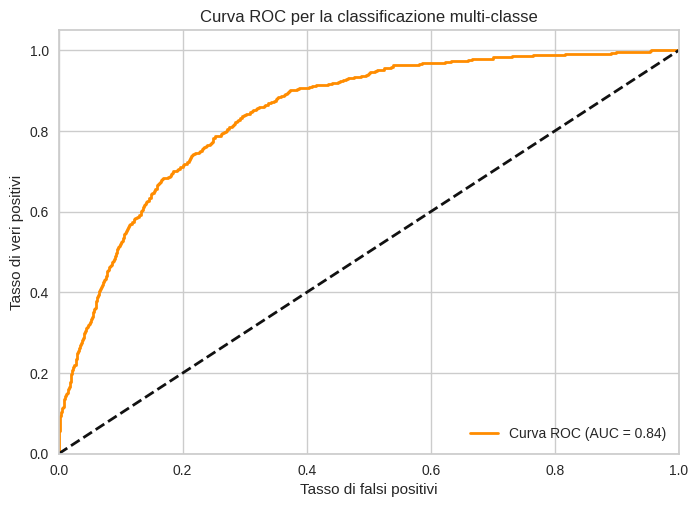

____________________________________
****** VALORE DI AUC *******
____________________________________
****** VALORE DI AUC *******
Micro-averaged One-vs-Rest ROC AUC score:
0.84
____________________________________
****** ROC CURVE: con metodo diretto *******


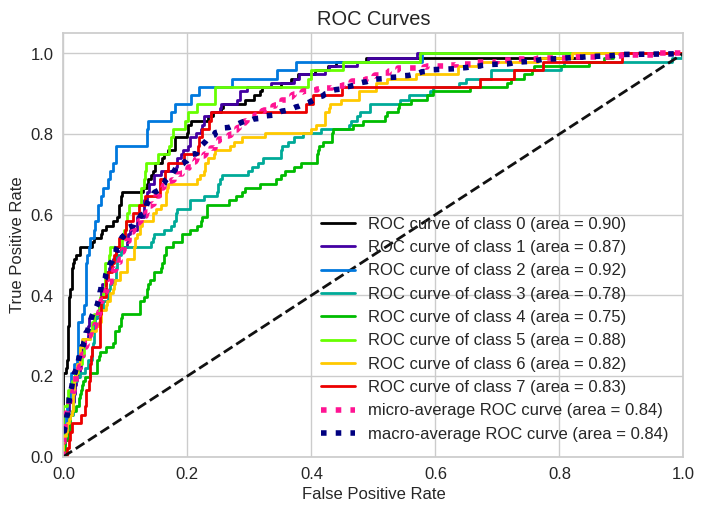

____________________________________
****** Precision recall: con metodo diretto *******


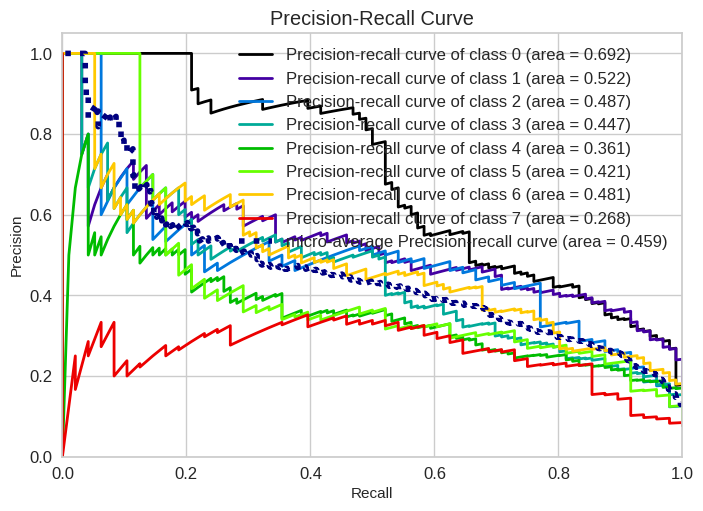

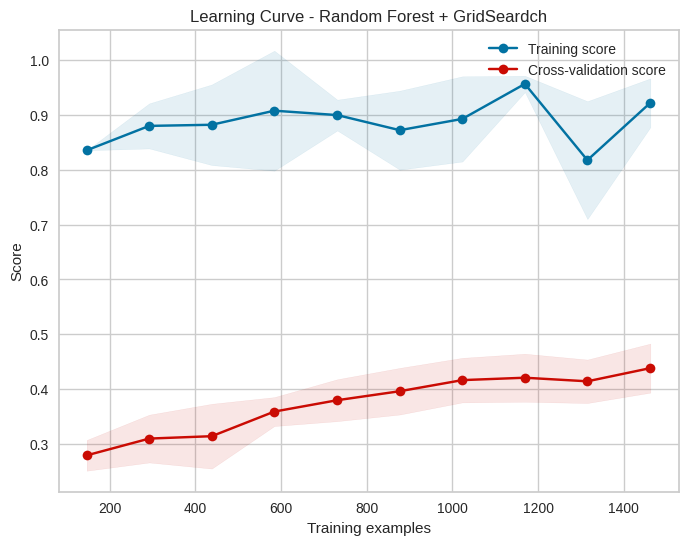

In [ ]:
#PLOT ROC

y_score = clf2.predict_proba(X_test)
plot_res(y_pred, y_score, y_test)

#PLOT LEARNING CURVE

from sklearn.model_selection import learning_curve
# Calcola la learning curve
train_sizes, train_scores, test_scores = learning_curve(
    clf2, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

# Calcola le medie e gli errori standard delle prestazioni
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plotta la learning curve
plt.figure(figsize=(8, 6))
plt.title('Learning Curve - Random Forest + GridSeardch')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.grid(True)
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color='b')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1,
                 color='r')
plt.plot(train_sizes, train_scores_mean, 'o-', color='b',
         label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='r',
         label='Cross-validation score')
plt.legend(loc='best')
plt.show()

In [ ]:
#Con i codi ci qui sotto vado a calcolare l'accuracy sui dati di train e
#di test er vedere se abbiamo overfitting

clf21 = MLPClassifier(hidden_layer_sizes=(128, 64, 32,), alpha=0.1, learning_rate='adaptive',
                    activation='tanh', early_stopping=True, momentum=0.9, random_state=0)
clf21.fit(X_train, y_train)
y_train_pred=clf21.predict(X_train)
train_acc=accuracy_score(y_train, y_train_pred)
print("Accuracy sul training", train_acc)
error_train=(1-train_acc)
print("L'errore sul train ottenuto equivale a: %", error_train)
print("______________________________________")

print()

clf22 = MLPClassifier(activation= 'relu', hidden_layer_sizes= (128, 64, 32), learning_rate= 'adaptive', momentum= 0.4, tol= 0.001)
clf22.fit(X_test, y_test)
y_test_pred=clf22.predict(X_test)
test_acc=accuracy_score(y_test, y_test_pred)
print("Accuracy sul test", test_acc)
error_test=(1-test_acc)
print("L'errore sul train ottenuto equivale a: %", error_test)

Accuracy sul training 0.7226477024070022
L'errore sul train ottenuto equivale a: % 0.27735229759299784
______________________________________

Accuracy sul test 1.0
L'errore sul train ottenuto equivale a: % 0.0


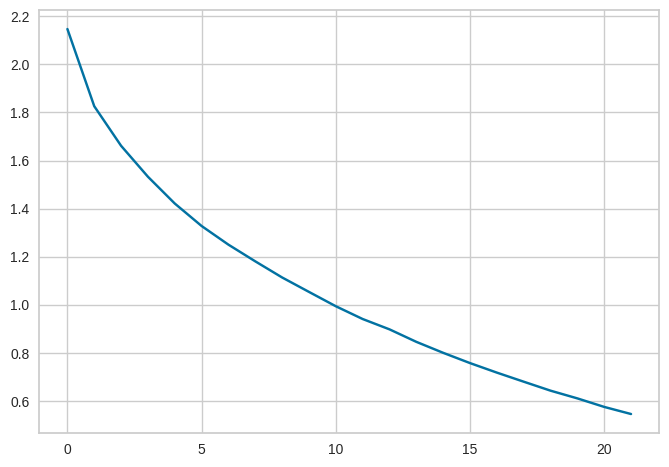

In [ ]:
plt.plot(clf2.loss_curve_)
plt.show()

##MULTILAYER PERCEPTRON + OVERSAMPLING

In [ ]:
import warnings
from sklearn.exceptions import ConvergenceWarning


ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))


Resampled dataset shape Counter({5: 280, 1: 280, 4: 280, 6: 280, 0: 280, 3: 280, 2: 280, 7: 280})


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Best parameters set found on development set:

{'activation': 'logistic', 'hidden_layer_sizes': (128, 64, 32), 'learning_rate': 'constant', 'momentum': 0.2, 'tol': 0.001}

Grid scores on development set:

0.250 (+/-0.071) for {'activation': 'logistic', 'hidden_layer_sizes': (12, 23, 11), 'learning_rate': 'constant', 'momentum': 0.1, 'tol': 0.01}
0.457 (+/-0.087) for {'activation': 'logistic', 'hidden_layer_sizes': (12, 23, 11), 'learning_rate': 'constant', 'momentum': 0.1, 'tol': 0.001}
0.477 (+/-0.062) for {'activation': 'logistic', 'hidden_layer_sizes': (12, 23, 11), 'learning_rate': 'constant', 'momentum': 0.1, 'tol': 0.0001}
0.204 (+/-0.090) for {'activation': 'logistic', 'hidden_layer_sizes': (12, 23, 11), 'learning_rate': 'constant', 'momentum': 0.2, 'tol': 0.01}
0.438 (+/-0.126) for {'activation': 'logistic', 'hidden_layer_sizes': (12, 23, 11), 'learning_rate': 'constant', 'momentum': 0.2, 'tol': 0.001}
0.475 (+/-0.056) for {'activation': 'logistic', 'hidden_layer_sizes': (12, 2

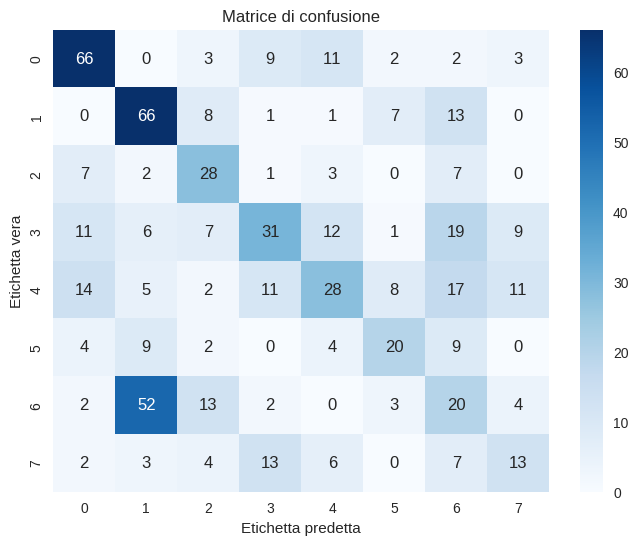

***** Calcolo dell'accuracy *****
Accuracy: 0.4359
____________________________________________
**** Calcolo della precisione *****
Percentuale di classificazioni positive che sono corrette: 0.4268
____________________________________________
**** Calcolo della recall (sensitivity) *****
Percentuale di elementi positivi del testing set che sono stati classificati come positivi: 0.4336
____________________________________________
**** Calcolo della specificity *****


NameError: ignored

In [ ]:
%%time
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

k_fold = StratifiedKFold(n_splits=4)


# Definizione dei parametri da testare
parameters = {
    'hidden_layer_sizes': [(12, 23, 11), (23, 43, 32), (128, 64, 32)],
    'activation': ['logistic', 'relu'],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'tol': [1e-2, 1e-3, 1e-4],
    #'alpha': 10.0 ** -np.arange(1, 7),
    'momentum' : [ 0.1, 0.2, 0.3, 0.4]

}

# Creazione dell'oggetto della rete neurale
neural_net = MLPClassifier()

# Creazione dell'oggetto GridSearchCV
grid_search = GridSearchCV(neural_net, parameters, cv=5)

# Addestramento della rete neurale con la grid search
grid_search.fit(X_res, y_res)

# Stampare i risultati
print("Best parameters set found on development set:")
print()
print(grid_search.best_params_)
print()
print("Grid scores on development set:")
print()
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid_search.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()

# Valutazione finale del modello
print("Best score achieved: %0.3f" % grid_search.best_score_)
print()
print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = y_test, grid_search.predict(X_test)
result_pred(y_test, y_pred)
y_score = clf.predict_proba(X_test)
plot_res(y_pred, y_score, y_test)

Target variable: emotion
{'activation': 'logistic', 'hidden_layer_sizes': (128, 64, 32), 'learning_rate': 'constant', 'momentum': 0.2, 'tol': 0.001}

In [ ]:

clf3 = MLPClassifier(hidden_layer_sizes=(128, 64, 32,), alpha=0.1, learning_rate='constant',
                    activation='logistic', early_stopping=False, momentum=0.2, random_state=0)
#-hidden_layer_sizes=(128, 64, 32,) definisce la struttura della rete neurale artificiale: in questo caso,
#si tratta di una rete a tre strati, con il primo strato contenente 128 neuroni, il secondo strato contenente 64 neuroni e il terzo strato contenente 32 neuroni.
#-alpha=0.1 specifica la regolarizzazione L2, che viene utilizzata per prevenire l'overfitting dei dati di addestramento
#-learning_rate='adaptive' indica che la dimensione del passo di apprendimento deve essere adattata automaticamente in base alla convergenza del modello.
#-activation='tanh' specifica la funzione di attivazione del neurone, che viene utilizzata per introdurre non-linearità nella rete neurale.
#-early_stopping=True utilizza la tecnica di early stopping, ovvero interrompe l'addestramento del modello quando la performance sul set di validazione smette di migliorare.
#-momentum=0.9 indica il valore del momentum, che viene utilizzato per aggiornare i pesi del modello in modo da evitare minimi locali durante l'addestramento.
#-random_state=0 imposta il seed per la generazione di numeri casuali, in modo da rendere riproducibili i risultati.

clf3.fit(X_train, y_train)

y_pred=clf.predict(X_test)
#Le righe successive addestrano il modello sulla base dei dati di addestramento X_train e y_train, utilizzando il metodo fit della classe MLPClassifier.
#Successivamente, il modello viene utilizzato per effettuare la predizione sui dati di test X_test utilizzando il metodo predict, e le predizioni risultanti vengono assegnate alla variabile y_pred

print("Accuracy %s", accuracy_score(y_test, y_pred))
print("F1-score %s", f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy %s 0.46153846153846156
F1-score %s [0.60465116 0.52444444 0.37735849 0.48051948 0.47488584 0.28571429
 0.37254902 0.25806452]
              precision    recall  f1-score   support

           0       0.55      0.68      0.60        96
           1       0.46      0.61      0.52        96
           2       0.34      0.42      0.38        48
           3       0.64      0.39      0.48        96
           4       0.42      0.54      0.47        96
           5       0.60      0.19      0.29        48
           6       0.35      0.40      0.37        96
           7       0.57      0.17      0.26        48

    accuracy                           0.46       624
   macro avg       0.49      0.42      0.42       624
weighted avg       0.49      0.46      0.45       624



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


VALUTIAMO L'OVERFITTING

In [ ]:
#Con i codi ci qui sotto vado a calcolare l'accuracy sui dati di train e
#di test er vedere se abbiamo overfitting

clf = MLPClassifier(hidden_layer_sizes=(128, 64, 32,), alpha=0.1, learning_rate='constant',
                    activation='logistic', early_stopping=False, momentum=0.2, random_state=0)
clf.fit(X_train, y_train)
y_train_pred=clf.predict(X_train)
train_acc=accuracy_score(y_train, y_train_pred)
print("Accuracy sul training", train_acc)
error_train=(1-train_acc)
print("L'errore sul train ottenuto equivale a: %", error_train)
print("______________________________________")

print()

clf = MLPClassifier(hidden_layer_sizes=(128, 64, 32,), alpha=0.1, learning_rate='constant',
                    activation='logistic', early_stopping=False, momentum=0.2, random_state=0)
clf.fit(X_test, y_test)
y_test_pred=clf.predict(X_test)
test_acc=accuracy_score(y_test, y_test_pred)
print("Accuracy sul test", test_acc)
error_test=(1-test_acc)
print("L'errore sul train ottenuto equivale a: %", error_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy sul training 0.8468271334792122
L'errore sul train ottenuto equivale a: % 0.15317286652078776
______________________________________

Accuracy sul test 0.6426282051282052
L'errore sul train ottenuto equivale a: % 0.3573717948717948


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


****** ROC CURVE + AUC?: passo passo *******


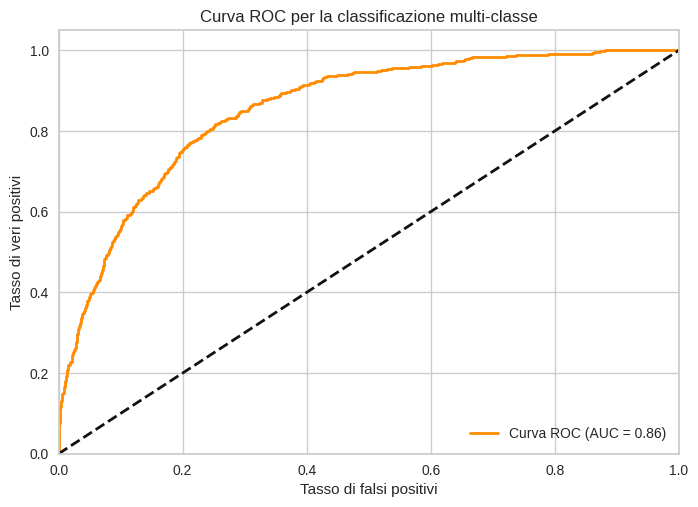

____________________________________
****** VALORE DI AUC *******
____________________________________
****** VALORE DI AUC *******
Micro-averaged One-vs-Rest ROC AUC score:
0.86
____________________________________
****** ROC CURVE: con metodo diretto *******


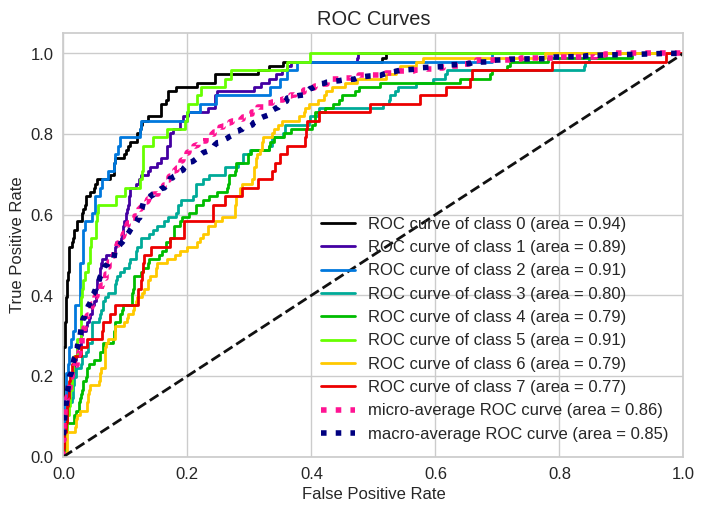

____________________________________
****** Precision recall: con metodo diretto *******


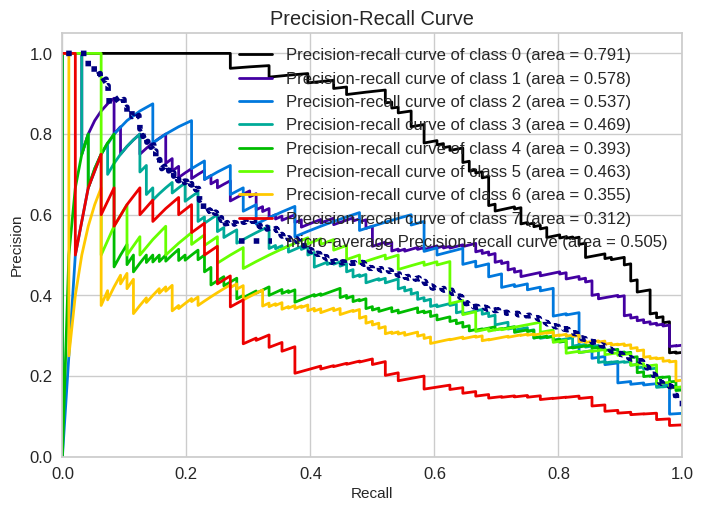

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

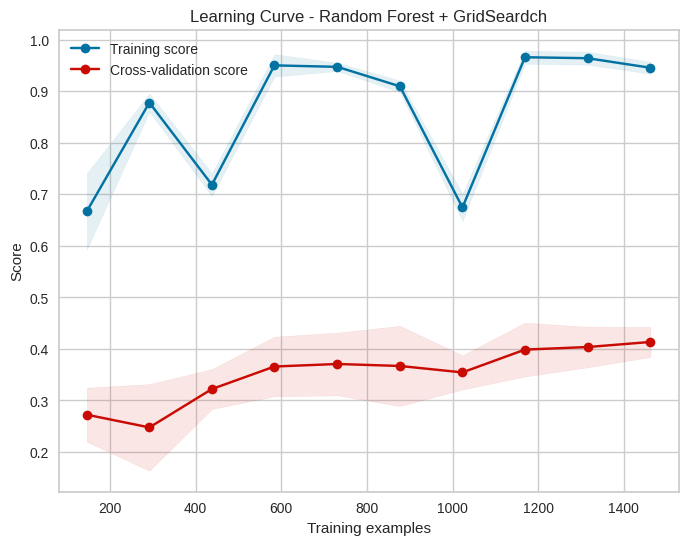

In [ ]:
#PLOT ROC

y_score = clf3.predict_proba(X_test)
plot_res(y_pred, y_score, y_test)

#PLOT LEARNING CURVE

from sklearn.model_selection import learning_curve
# Calcola la learning curve
train_sizes, train_scores, test_scores = learning_curve(
    clf3, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

# Calcola le medie e gli errori standard delle prestazioni
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plotta la learning curve
plt.figure(figsize=(8, 6))
plt.title('Learning Curve - Random Forest + GridSeardch')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.grid(True)
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color='b')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1,
                 color='r')
plt.plot(train_sizes, train_scores_mean, 'o-', color='b',
         label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='r',
         label='Cross-validation score')
plt.legend(loc='best')
plt.show()

##MULTILAYER + UNDERSAMPLING

è UN ESPERIMENTO: PROVO A RIDURRE CON PCA PER VEDERE SE CAMBIANO LE PERFORMANCE

In [ ]:
ros = RandomUnderSampler(random_state=42)
X_res1, y_res1 = ros.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res1))

Resampled dataset shape Counter({0: 140, 1: 140, 2: 140, 3: 140, 4: 140, 5: 140, 6: 140, 7: 140})


In [ ]:
neural_net1 = MLPClassifier(activation= 'relu', hidden_layer_sizes= (128, 64, 32), learning_rate= 'adaptive', momentum= 0.4, tol= 0.001)
neural_net1.fit(X_res1,y_res1)
y_pred = neural_net1.predict(X_res1)
print(classification_report(y_res1, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       140
           1       1.00      1.00      1.00       140
           2       1.00      1.00      1.00       140
           3       1.00      1.00      1.00       140
           4       1.00      1.00      1.00       140
           5       1.00      1.00      1.00       140
           6       1.00      1.00      1.00       140
           7       1.00      1.00      1.00       140

    accuracy                           1.00      1120
   macro avg       1.00      1.00      1.00      1120
weighted avg       1.00      1.00      1.00      1120



****** ROC CURVE + AUC?: passo passo *******


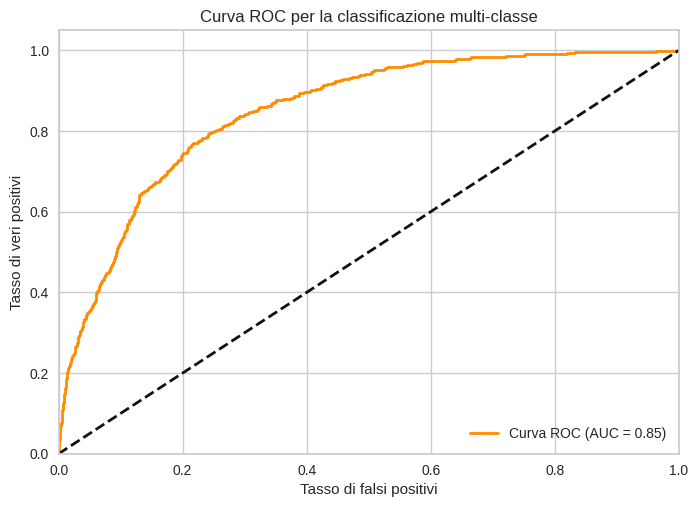

____________________________________
****** VALORE DI AUC *******
____________________________________
****** VALORE DI AUC *******
Micro-averaged One-vs-Rest ROC AUC score:
0.85
____________________________________
****** ROC CURVE: con metodo diretto *******


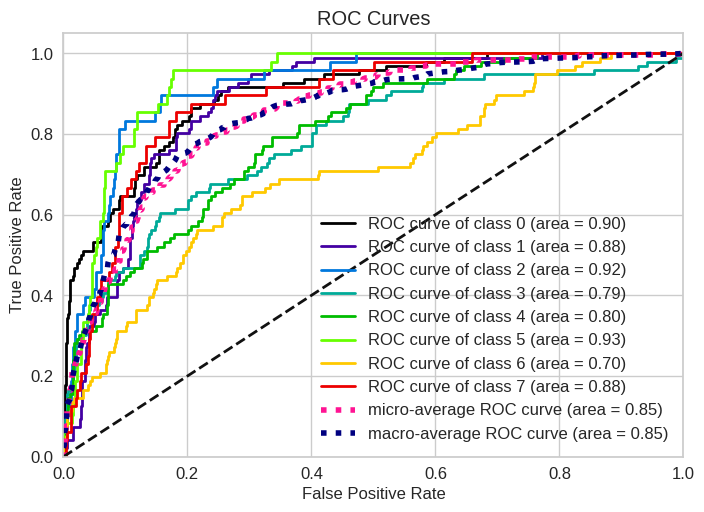

____________________________________
****** Precision recall: con metodo diretto *******


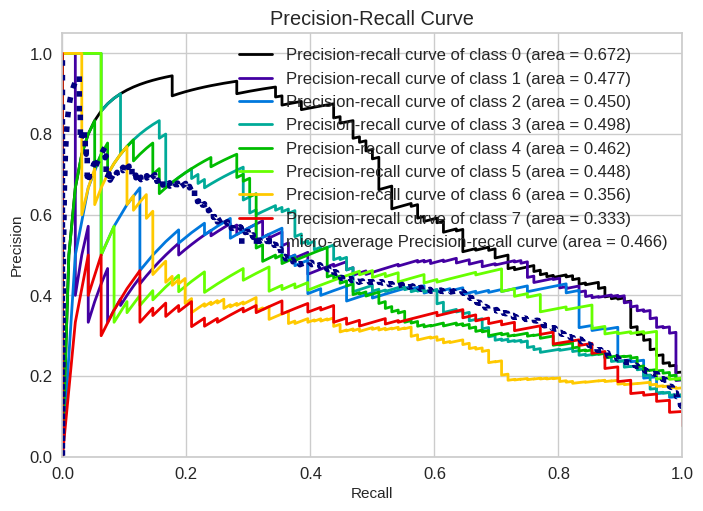

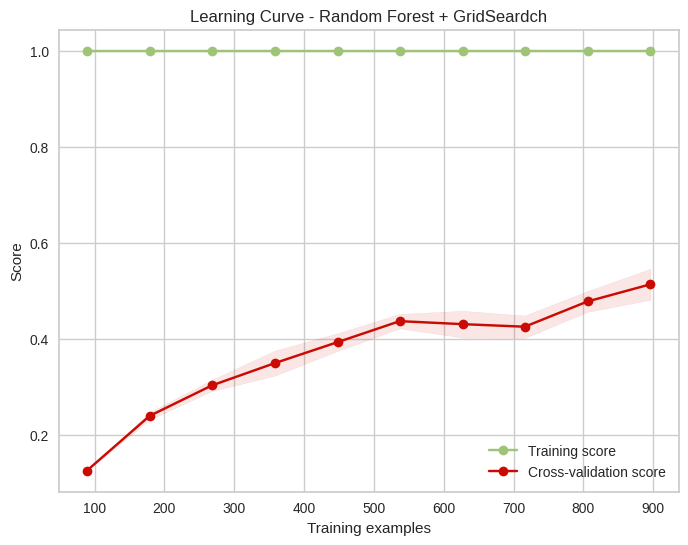

In [ ]:
#PLOT ROC

y_score = neural_net1.predict_proba(X_test)
plot_res(y_pred, y_score, y_test)

#PLOT LEARNING CURVE

from sklearn.model_selection import learning_curve
# Calcola la learning curve
train_sizes, train_scores, test_scores = learning_curve(
    neural_net1, X_res1, y_res1, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

# Calcola le medie e gli errori standard delle prestazioni
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plotta la learning curve
plt.figure(figsize=(8, 6))
plt.title('Learning Curve - Random Forest + GridSeardch')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.grid(True)
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color='b')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1,
                 color='r')
plt.plot(train_sizes, train_scores_mean, 'o-', color='g',
         label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='r',
         label='Cross-validation score')
plt.legend(loc='best')
plt.show()

NON FUNZIONA BENE, QUINDI PROSEGUO SEMPLICEMNTE CON MULTILAYER + IMBALANCED NORMALE

In [ ]:
ros = RandomUnderSampler(random_state=42)
X_res2, y_res2 = ros.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res2))

Resampled dataset shape Counter({0: 140, 1: 140, 2: 140, 3: 140, 4: 140, 5: 140, 6: 140, 7: 140})


In [ ]:
%%time
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

k_fold = StratifiedKFold(n_splits=4)


# Definizione dei parametri da testare
parameters = {
    'hidden_layer_sizes': [(12, 23, 11), (23, 43, 32), (128, 64, 32)],
    'activation': ['logistic', 'relu'],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'tol': [1e-2, 1e-3, 1e-4],
    #'alpha': 10.0 ** -np.arange(1, 7),
    'momentum' : [ 0.1, 0.2, 0.3, 0.4]

}

# Creazione dell'oggetto della rete neurale
neural_net2 = MLPClassifier()

# Creazione dell'oggetto GridSearchCV
grid_search = GridSearchCV(neural_net2, parameters, cv=5)

# Addestramento della rete neurale con la grid search
grid_search.fit(X_res2, y_res2)

# Stampare i risultati
print("Best parameters set found on development set:")
print()
print(grid_search.best_params_)
print()
print("Grid scores on development set:")
print()
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid_search.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()

# Valutazione finale del modello
print("Best score achieved: %0.3f" % grid_search.best_score_)
print()
print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = y_test, grid_search.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Best parameters set found on development set:

{'activation': 'logistic', 'hidden_layer_sizes': (128, 64, 32), 'learning_rate': 'adaptive', 'momentum': 0.1, 'tol': 0.001}

Grid scores on development set:

0.153 (+/-0.064) for {'activation': 'logistic', 'hidden_layer_sizes': (12, 23, 11), 'learning_rate': 'constant', 'momentum': 0.1, 'tol': 0.01}
0.337 (+/-0.144) for {'activation': 'logistic', 'hidden_layer_sizes': (12, 23, 11), 'learning_rate': 'constant', 'momentum': 0.1, 'tol': 0.001}
0.357 (+/-0.097) for {'activation': 'logistic', 'hidden_layer_sizes': (12, 23, 11), 'learning_rate': 'constant', 'momentum': 0.1, 'tol': 0.0001}
0.186 (+/-0.076) for {'activation': 'logistic', 'hidden_layer_sizes': (12, 23, 11), 'learning_rate': 'constant', 'momentum': 0.2, 'tol': 0.01}
0.371 (+/-0.078) for {'activation': 'logistic', 'hidden_layer_sizes': (12, 23, 11), 'learning_rate': 'constant', 'momentum': 0.2, 'tol': 0.001}
0.346 (+/-0.046) for {'activation': 'logistic', 'hidden_layer_sizes': (12, 2

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
print(classification_report(y_true, y_pred))


              precision    recall  f1-score   support

           0       0.59      0.60      0.59        96
           1       0.50      0.58      0.54        96
           2       0.36      0.79      0.49        48
           3       0.51      0.32      0.39        96
           4       0.36      0.23      0.28        96
           5       0.35      0.42      0.38        48
           6       0.27      0.22      0.24        96
           7       0.42      0.42      0.42        48

    accuracy                           0.43       624
   macro avg       0.42      0.45      0.42       624
weighted avg       0.43      0.43      0.41       624



In [ ]:
#PLOT ROC

y_score = neural_net2.predict_proba(X_test)
plot_res(y_pred, y_score, y_test)

#PLOT LEARNING CURVE

from sklearn.model_selection import learning_curve
# Calcola la learning curve
train_sizes, train_scores, test_scores = learning_curve(
    neural_net2, X_res2, y_res2, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

# Calcola le medie e gli errori standard delle prestazioni
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plotta la learning curve
plt.figure(figsize=(8, 6))
plt.title('Learning Curve - Random Forest + GridSeardch')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.grid(True)
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color='b')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1,
                 color='r')
plt.plot(train_sizes, train_scores_mean, 'o-', color='b',
         label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='r',
         label='Cross-validation score')
plt.legend(loc='best')
plt.show()

NotFittedError: ignored

In [ ]:
clf4 = MLPClassifier(activation= 'relu', hidden_layer_sizes= (128, 64, 32), learning_rate= 'adaptive', momentum= 0.4, tol= 0.001)
#-hidden_layer_sizes=(128, 64, 32,) definisce la struttura della rete neurale artificiale: in questo caso,
#si tratta di una rete a tre strati, con il primo strato contenente 128 neuroni, il secondo strato contenente 64 neuroni e il terzo strato contenente 32 neuroni.
#-alpha=0.1 specifica la regolarizzazione L2, che viene utilizzata per prevenire l'overfitting dei dati di addestramento
#-learning_rate='adaptive' indica che la dimensione del passo di apprendimento deve essere adattata automaticamente in base alla convergenza del modello.
#-activation='tanh' specifica la funzione di attivazione del neurone, che viene utilizzata per introdurre non-linearità nella rete neurale.
#-early_stopping=True utilizza la tecnica di early stopping, ovvero interrompe l'addestramento del modello quando la performance sul set di validazione smette di migliorare.
#-momentum=0.9 indica il valore del momentum, che viene utilizzato per aggiornare i pesi del modello in modo da evitare minimi locali durante l'addestramento.
#-random_state=0 imposta il seed per la generazione di numeri casuali, in modo da rendere riproducibili i risultati.

clf4.fit(X_train, y_train)

y_pred=clf4.predict(X_test)
#Le righe successive addestrano il modello sulla base dei dati di addestramento X_train e y_train, utilizzando il metodo fit della classe MLPClassifier.
#Successivamente, il modello viene utilizzato per effettuare la predizione sui dati di test X_test utilizzando il metodo predict, e le predizioni risultanti vengono assegnate alla variabile y_pred

print("Accuracy %s", accuracy_score(y_test, y_pred))
print("F1-score %s", f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy %s 0.4583333333333333
F1-score %s [0.60606061 0.51741294 0.42696629 0.48314607 0.48958333 0.25806452
 0.33484163 0.27027027]
              precision    recall  f1-score   support

           0       0.52      0.73      0.61        96
           1       0.50      0.54      0.52        96
           2       0.46      0.40      0.43        48
           3       0.52      0.45      0.48        96
           4       0.49      0.49      0.49        96
           5       0.57      0.17      0.26        48
           6       0.30      0.39      0.33        96
           7       0.38      0.21      0.27        48

    accuracy                           0.46       624
   macro avg       0.47      0.42      0.42       624
weighted avg       0.47      0.46      0.45       624



VALUTIAMO L'OVERFITTING

In [ ]:
#Con i codi ci qui sotto vado a calcolare l'accuracy sui dati di train e
#di test er vedere se abbiamo overfitting

clf4 = MLPClassifier(activation= 'relu', hidden_layer_sizes= (128, 64, 32), learning_rate= 'adaptive', momentum= 0.4, tol= 0.001)
clf.fit(X_train, y_train)
y_train_pred=clf4.predict(X_train)
train_acc=accuracy_score(y_train, y_train_pred)
print("Accuracy sul training", train_acc)
error_train=(1-train_acc)
print("L'errore sul train ottenuto equivale a: %", error_train)
print("______________________________________")

print()

clf4 = MLPClassifier(activation= 'relu', hidden_layer_sizes= (128, 64, 32), learning_rate= 'adaptive', momentum= 0.4, tol= 0.001)
clf4.fit(X_test, y_test)
y_test_pred=clf4.predict(X_test)
test_acc=accuracy_score(y_test, y_test_pred)
print("Accuracy sul test", test_acc)
error_test=(1-test_acc)
print("L'errore sul train ottenuto equivale a: %", error_test)

NotFittedError: ignored

****** ROC CURVE + AUC?: passo passo *******


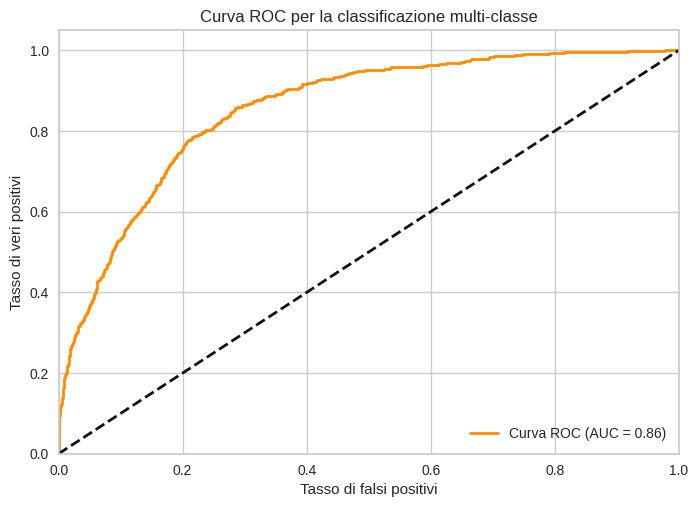

____________________________________
****** VALORE DI AUC *******
____________________________________
****** VALORE DI AUC *******
Micro-averaged One-vs-Rest ROC AUC score:
0.86
____________________________________
****** ROC CURVE: con metodo diretto *******


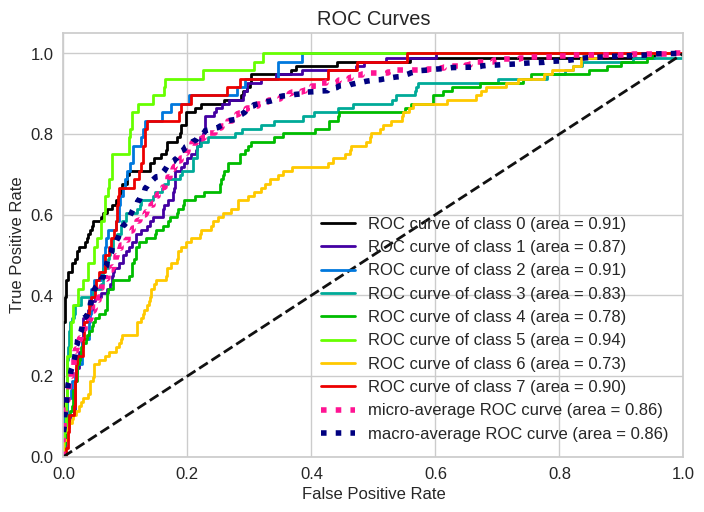

____________________________________
****** Precision recall: con metodo diretto *******


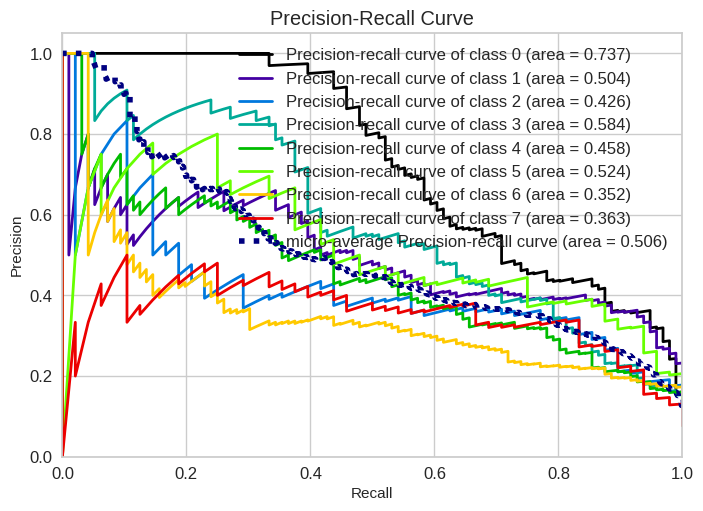

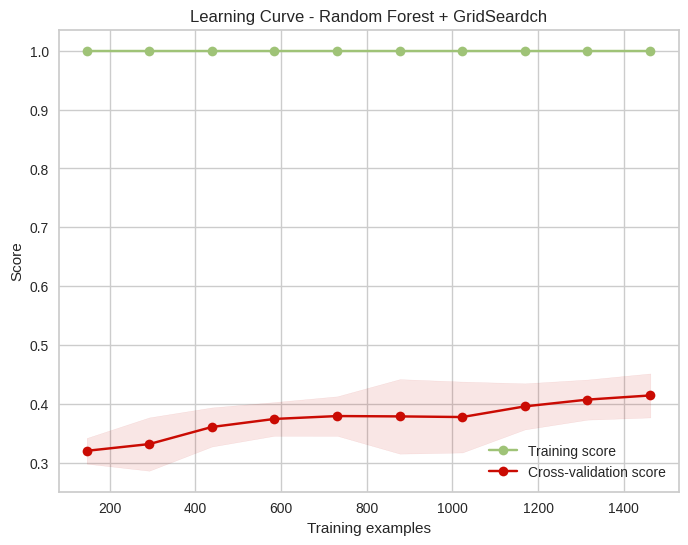

In [ ]:
#PLOT ROC

y_score = clf.predict_proba(X_test)
plot_res(y_pred, y_score, y_test)

#PLOT LEARNING CURVE

from sklearn.model_selection import learning_curve
# Calcola la learning curve
train_sizes, train_scores, test_scores = learning_curve(
    clf4, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

# Calcola le medie e gli errori standard delle prestazioni
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plotta la learning curve
plt.figure(figsize=(8, 6))
plt.title('Learning Curve - Random Forest + GridSeardch')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.grid(True)
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color='b')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1,
                 color='r')
plt.plot(train_sizes, train_scores_mean, 'o-', color='g',
         label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='r',
         label='Cross-validation score')
plt.legend(loc='best')
plt.show()

##KERAS DEEP NEURAL NETWORK

In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import SGD
from sklearn.model_selection import GridSearchCV
from keras.regularizers import l2
from keras import backend as K


In [ ]:
def f1(y_true, y_pred):
    prec = precision(y_true, y_pred)
    rec = recall(y_true, y_pred)

    return 2*((prec*rec)/(prec+rec+K.epsilon()))
def recall(y_true, y_pred):
    """Recall metric.

    Only computes a batch-wise average of recall.

    Computes the recall, a metric for multi-label classification of
    how many relevant items are selected.
    """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall
def precision(y_true, y_pred):
    """Precision metric.

    Only computes a batch-wise average of precision.

    Computes the precision, a metric for multi-label classification of
    how many selected items are relevant.
    """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

In [ ]:
keras.backend.clear_session()

tf.random.set_seed(42)

NameError: ignored

In [ ]:
n_classes = 8
def build_model():

    n_feature = X_train.shape[1]
    model = Sequential()
    model.add(Dense(128, input_dim=n_feature, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(n_classes, activation='softmax'))

    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer="adam", metrics=['accuracy'])
    return model

In [ ]:
def build_model_1(optimizer='SGD'):
    n_feature = X_train.shape[1]
    model = Sequential()
    model.add(Dense(32, input_dim=n_feature, activation='tanh'))
    model.add(Dense(32, activation='tanh'))
    model.add(Dense(32, activation='tanh'))
    model.add(Dense(32, activation='tanh'))
    model.add(Dense(32, activation='tanh'))
    model.add(Dense(32, activation='tanh'))
    model.add(Dense(32, activation='tanh'))
    model.add(Dense(32, activation='tanh'))
    # Linear
    model.add(Dense(8, activation='softmax'))
    model.compile(loss='SparseCategoricalCrossentropy', optimizer=optimizer, metrics=[f1])
    return model

In [ ]:
def build_model_2(optimizer='SGD'):
    n_feature = X_train.shape[1]
    model = Sequential()
    model.add(Dense(128, input_dim=n_feature, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(32, activation='relu'))
    # Linear
    model.add(Dense(8, activation='softmax'))
    model.compile(loss='SparseCategoricalCrossentropy', optimizer=optimizer, metrics=[f1])
    return model

In [ ]:
model1 = build_model_1()
history1 = model1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=150, batch_size=10).history



In [ ]:
model2 = build_model_2()
history2 = model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=10).history

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model1, to_file='model1.png', show_shapes=True, show_layer_names=True)

In [ ]:
plot_model(model2, to_file='model2.png', show_shapes=True, show_layer_names=True)


In [ ]:
model = KerasClassifier(build_fn=build_model)
model.fit(X_train, y_train, validation_split=0.2, epochs=300, batch_size=10)

y_pred = model.predict(X_test).astype(int)

y_scores = model.predict_proba(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))

print('F1-score %s' % f1_score(y_test, y_pred, average=None))

print(classification_report(y_test, y_pred))

In [ ]:
model1 = KerasClassifier(build_fn=build_model_1)
model1.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=10)


y_pred = model1.predict(X_test).astype(int)

y_scores = model1.predict_proba(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))

print('F1-score %s' % f1_score(y_test, y_pred, average=None))

print(classification_report(y_test, y_pred))

In [ ]:
model2 = KerasClassifier(build_fn=build_model_2)
model2.fit(X_train, y_train, validation_split=0.2, epochs=30, batch_size=10)


y_pred = model.predict(X_test).astype(int)

y_scores = model.predict_proba(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))

print('F1-score %s' % f1_score(y_test, y_pred, average=None))

print(classification_report(y_test, y_pred))

In [ ]:
%%time
model = KerasClassifier(build_fn=build_model_1)

# Definizione dei parametri per la grid search
param_grid = {
    'optimizer': ['adam', 'sgd'],
    'batch_size': [10, 20, -1],
    'epochs': [100, 200,300]
}

# Creazione dell'oggetto GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)

# Addestramento del modello con la grid search
grid_result = grid.fit(X_train, y_train)

# Stampa dei risultati
print("Miglior set di parametri: ", grid_result.best_params_)
print("Miglior accuratezza media: ", grid_result.best_score_)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

# Predizione sui dati di test utilizzando il miglior modello
y_pred = grid_result.best_estimator_.predict(X_test)

# Calcolo della matrice di confusione
cm = confusion_matrix(y_test, y_pred)

# Calcolo dell'accuratezza
accuracy = accuracy_score(y_test, y_pred)

# Calcolo del punteggio F1
#f1 = f1_score(y_test, y_pred)

# Plot della matrice di confusione
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Matrice di Confusione')
plt.xlabel('Etichetta Predetta')
plt.ylabel('Etichetta Reale')
plt.show()

# Stampa dell'accuratezza e del punteggio F1
print("Accuratezza: {:.2f}%".format(accuracy * 100))
print("Punteggio F1: {:.2f}".format(f1))


In [ ]:
%%time
model = KerasClassifier(build_fn=build_model_2)

# Definizione dei parametri per la grid search
param_grid = {
    'optimizer': ['adam', 'sgd'],
    'batch_size': [10, 20, -1],
    'epochs': [50,100,150]
}

# Creazione dell'oggetto GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)

# Addestramento del modello con la grid search
grid_result = grid.fit(X_train, y_train)

# Stampa dei risultati
print("Miglior set di parametri: ", grid_result.best_params_)
print("Miglior accuratezza media: ", grid_result.best_score_)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

# Predizione sui dati di test utilizzando il miglior modello
y_pred = grid_result.best_estimator_.predict(X_test)

# Calcolo della matrice di confusione
cm = confusion_matrix(y_test, y_pred)

# Calcolo dell'accuratezza
accuracy = accuracy_score(y_test, y_pred)

# Calcolo del punteggio F1
f1 = f1_score(y_test, y_pred)

# Plot della matrice di confusione
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Matrice di Confusione')
plt.xlabel('Etichetta Predetta')
plt.ylabel('Etichetta Reale')
plt.show()

# Stampa dell'accuratezza e del punteggio F1
print("Accuratezza: {:.2f}%".format(accuracy * 100))
print("Punteggio F1: {:.2f}".format(f1))


In [ ]:
clf5 = KerasClassifier(build_fn=build_model_2, optimizer='sgd', batch_size= 10, epochs=100)

In [ ]:
clf5.fit(X_train, y_train, epochs=100)

In [ ]:
clf5.model_.summary()

In [ ]:
y_pred = clf5.predict(X_test).astype(int)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

20/20 [==============================] - 0s 1ms/step
Accuracy 0.15384615384615385
F1-score [0.26666667 0.         0.         0.         0.         0.
 0.         0.        ]
              precision    recall  f1-score   support

           0       0.15      1.00      0.27        96
           1       0.00      0.00      0.00        96
           2       0.00      0.00      0.00        48
           3       0.00      0.00      0.00        96
           4       0.00      0.00      0.00        96
           5       0.00      0.00      0.00        48
           6       0.00      0.00      0.00        96
           7       0.00      0.00      0.00        48

    accuracy                           0.15       624
   macro avg       0.02      0.12      0.03       624
weighted avg       0.02      0.15      0.04       624



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


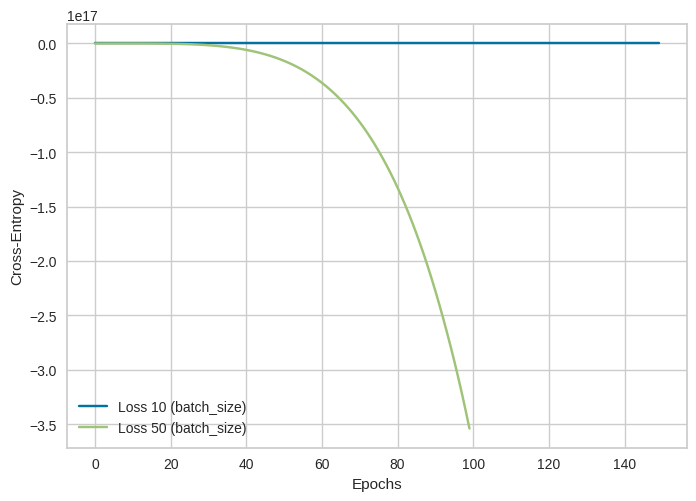

In [ ]:
plt.plot(history1['loss'], label='Loss 10 (batch_size)')
plt.plot(history2['loss'], label='Loss 50 (batch_size)')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy')
plt.legend()
plt.show()


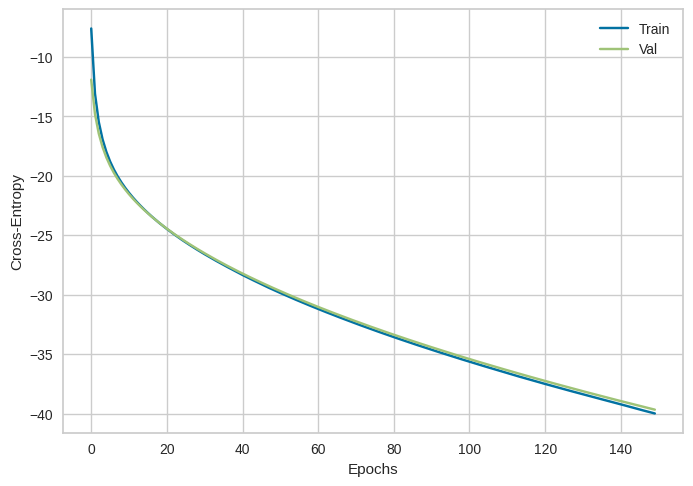

In [ ]:
plt.plot(history1['loss'], label='Train')
plt.plot(history1['val_loss'], label='Val')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy')
plt.legend()
plt.show()

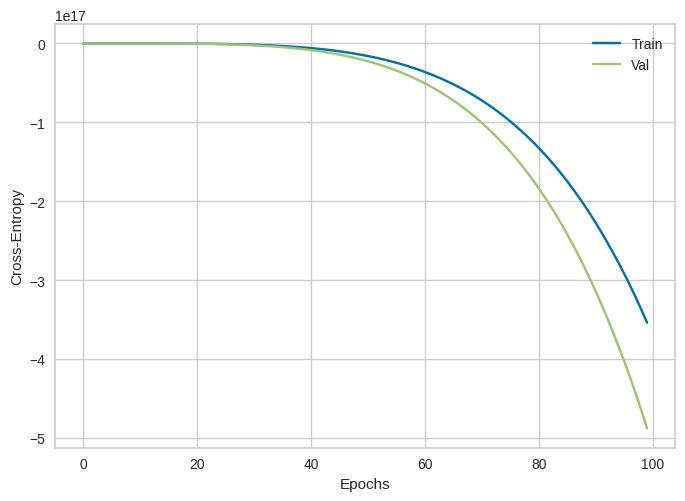

In [ ]:
plt.plot(history2['loss'], label='Train')
plt.plot(history2['val_loss'], label='Val')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy')
plt.legend()
plt.show()

In [ ]:
#y_pred = model1.predict_classes(X_test)
#result_pred(y_test, y_pred)
y_pred = model1.predict(X_test).astype(int)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))


y_pred = model2.predict(X_test).astype(int)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

#plot_res(y_pred, y_score, y_test)
#y_pred = model2.predict_classes(X_test)
#result_pred(y_test, y_pred)
#plot_res(y_pred, y_score, y_test

##VALUTAZIONE MODELLI

In [ ]:
test_loss_1, test_acc_1 = model1.evaluate(X_test, y_test)
test_loss_2, test_acc_2 = model2.evaluate(X_test, y_test)

print('Loss %f, Accuracy %f' % (test_loss_1, test_acc_1))
print('Loss %f, Accuracy %f' % (test_loss_2, test_acc_2))

#Questa serie di codice calcola la loss e l'accuracy del modello model1 sui
# dati di test X_test e y_test, che rappresentano rispettivamente le feature
# e le etichette (o target) del dataset di test.
#La funzione evaluate() del modello model1 restituisce la loss e l'accuracy
#calcolate sui dati di test. Questi valori vengono quindi salvati nelle
#variabili test_loss_1 e test_acc_1, che vengono infine stampati a video.

In [ ]:
plt.plot(history1['loss'])
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy')
plt.show()
plt.plot(history1['accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

Questo codice plotta due grafici relativi alla storia dell'addestramento del modello di una rete neurale (neural network).

Il primo grafico mostra la perdita (loss) del modello (in questo caso è usata la cross-entropy come funzione di perdita). L'asse x rappresenta il numero di epoche, ovvero il numero di volte in cui il modello è stato addestrato su tutto il set di dati di addestramento, mentre l'asse y rappresenta il valore della funzione di perdita per ogni epoca. L'obiettivo dell'addestramento del modello è di minimizzare la funzione di perdita, quindi il grafico dovrebbe mostrare una tendenza decrescente della perdita all'aumentare del numero di epoche.

Il secondo grafico mostra l'accuratezza (accuracy) del modello, ovvero la percentuale di predizioni corrette rispetto al totale delle predizioni effettuate. Anche in questo caso, l'asse x rappresenta il numero di epoche e l'asse y rappresenta l'accuratezza del modello per ogni epoca. L'obiettivo dell'addestramento è di massimizzare l'accuratezza del modello, quindi il grafico dovrebbe mostrare una tendenza crescente dell'accuratezza all'aumentare del numero di epoche.

In [ ]:
test_loss_1, test_acc_1 = model1.evaluate(X_test, y_test)
print('Loss %f, Accuracy %f' % (test_loss_1, test_acc_1))
#Questa serie di codice calcola la loss e l'accuracy del modello model1 sui
# dati di test X_test e y_test, che rappresentano rispettivamente le feature
# e le etichette (o target) del dataset di test.
#La funzione evaluate() del modello model1 restituisce la loss e l'accuracy
#calcolate sui dati di test. Questi valori vengono quindi salvati nelle
#variabili test_loss_1 e test_acc_1, che vengono infine stampati a video.

##REGOLAZIONI


In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
es = EarlyStopping(monitor='val_accuracy', patience=50, verbose=True)
mc = ModelCheckpoint('best_model_NOREG.h5', monitor='val_accuracy', save_best_only=True)

clf6 = KerasClassifier(build_model, callbacks=[es, mc])

<ipython-input-27-4cd95eb85397>:4: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  clf = KerasClassifier(build_model, callbacks=[es, mc])


In [ ]:
clf6.fit(X_train, y_train, validation_split=0.2, epochs=500)

Epoch 1/500
46/46 [==============================] - 1s 5ms/step - loss: 1.8308 - accuracy: 0.2948 - val_loss: 1.6724 - val_accuracy: 0.3798
Epoch 2/500
46/46 [==============================] - 0s 3ms/step - loss: 1.3713 - accuracy: 0.4945 - val_loss: 1.5691 - val_accuracy: 0.4235
Epoch 3/500
46/46 [==============================] - 0s 2ms/step - loss: 1.1404 - accuracy: 0.5903 - val_loss: 1.6766 - val_accuracy: 0.3552
Epoch 4/500
46/46 [==============================] - 0s 2ms/step - loss: 0.9739 - accuracy: 0.6546 - val_loss: 1.6325 - val_accuracy: 0.3962
Epoch 5/500
46/46 [==============================] - 0s 2ms/step - loss: 0.8270 - accuracy: 0.7038 - val_loss: 1.7045 - val_accuracy: 0.4262
Epoch 6/500
46/46 [==============================] - 0s 2ms/step - loss: 0.7190 - accuracy: 0.7709 - val_loss: 1.7728 - val_accuracy: 0.4071
Epoch 7/500
46/46 [==============================] - 0s 2ms/step - loss: 0.6112 - accuracy: 0.8174 - val_loss: 1.8656 - val_accuracy: 0.4016
Epoch 8/500
4

In [ ]:
y_pred = clf6.predict(X_test).astype(int)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

20/20 [==============================] - 0s 965us/step
Accuracy 0.453525641025641
F1-score [0.63779528 0.47674419 0.41904762 0.48677249 0.38823529 0.31168831
 0.4        0.13114754]
              precision    recall  f1-score   support

           0       0.51      0.84      0.64        96
           1       0.54      0.43      0.48        96
           2       0.39      0.46      0.42        48
           3       0.49      0.48      0.49        96
           4       0.45      0.34      0.39        96
           5       0.41      0.25      0.31        48
           6       0.35      0.46      0.40        96
           7       0.31      0.08      0.13        48

    accuracy                           0.45       624
   macro avg       0.43      0.42      0.41       624
weighted avg       0.45      0.45      0.43       624



##L2

In [ ]:
from keras.regularizers import l2, l1

def build_L2_model():
    model = Sequential()

    n_feature = X_train.shape[1]
    h_dim=100
    model.add(Dense(h_dim, activation='relu',
                    input_shape=(n_feature,), kernel_regularizer=l2(0.001)))
    model.add(Dense(h_dim, activation='relu'))
    model.add(Dense(h_dim, activation='relu'))
    model.add(Dense(h_dim, activation='relu'))
    model.add(Dense(n_classes))

    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model

In [ ]:
mc = ModelCheckpoint('best_model_L2.h5', monitor='val_accuracy', save_best_only=True)

L2_model = KerasClassifier(build_L2_model, callbacks=[es,mc])
L2_model.fit(X_train, y_train, validation_split=0.2, epochs=500)

Epoch 1/500


<ipython-input-33-0858c7534878>:3: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  L2_model = KerasClassifier(build_L2_model, callbacks=[es,mc])


46/46 [==============================] - 1s 6ms/step - loss: 3.2160 - accuracy: 0.1580 - val_loss: 2.2013 - val_accuracy: 0.1639
Epoch 2/500
46/46 [==============================] - 0s 3ms/step - loss: 2.1982 - accuracy: 0.1648 - val_loss: 2.2007 - val_accuracy: 0.1667
Epoch 3/500
46/46 [==============================] - 0s 3ms/step - loss: 2.1975 - accuracy: 0.1635 - val_loss: 2.1999 - val_accuracy: 0.1639
Epoch 4/500
46/46 [==============================] - 0s 3ms/step - loss: 2.1967 - accuracy: 0.1628 - val_loss: 2.1990 - val_accuracy: 0.1639
Epoch 5/500
46/46 [==============================] - 0s 3ms/step - loss: 2.1957 - accuracy: 0.1642 - val_loss: 2.1980 - val_accuracy: 0.1639
Epoch 6/500
46/46 [==============================] - 0s 3ms/step - loss: 2.1947 - accuracy: 0.1642 - val_loss: 2.1970 - val_accuracy: 0.1639
Epoch 7/500
46/46 [==============================] - 0s 3ms/step - loss: 2.1936 - accuracy: 0.1662 - val_loss: 2.1959 - val_accuracy: 0.1639
Epoch 8/500
46/46 [======

In [ ]:
y_pred = L2_model.predict(X_test).astype(int)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

20/20 [==============================] - 0s 1ms/step
Accuracy 0.07692307692307693
F1-score [0.         0.         0.14285714 0.         0.         0.
 0.         0.        ]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        96
           1       0.00      0.00      0.00        96
           2       0.08      1.00      0.14        48
           3       0.00      0.00      0.00        96
           4       0.00      0.00      0.00        96
           5       0.00      0.00      0.00        48
           6       0.00      0.00      0.00        96
           7       0.00      0.00      0.00        48

    accuracy                           0.08       624
   macro avg       0.01      0.12      0.02       624
weighted avg       0.01      0.08      0.01       624



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#SKLEARN WRAPPER

In [ ]:
!pip install scikeras

In [ ]:
from scikeras.wrappers import KerasClassifier

KerasClassifier è un wrapper che permette di utilizzare modelli di rete neurale creati con Keras all'interno di altre librerie come Scikit-learn. In pratica, permette di usare modelli Keras come se fossero degli estimatori Scikit-learn, con tutti i vantaggi che ne derivano, come ad esempio la possibilità di utilizzare il metodo fit() per addestrare il modello e il metodo predict() per effettuare predizioni su nuovi dati.

KerasClassifier permette inoltre di specificare alcune opzioni come la funzione di perdita, l'ottimizzatore e il numero di epoche di addestramento.

(((In programmazione, un wrapper (letteralmente "incarto" o "avvolgimento") è una funzione o un oggetto che copre o incapsula un'altra funzione o oggetto, fornendo un'interfaccia più semplice o unificata per l'utilizzo di tale funzione o oggetto. Un wrapper può essere utilizzato per adattare una funzione o un oggetto alle esigenze di un particolare contesto o per semplificare l'utilizzo di una funzione o un oggetto complesso. In pratica, un wrapper è una sorta di involucro che fornisce un'interfaccia più comoda per accedere a funzionalità più complesse o per adattare tali funzionalità a un particolare contesto o scopo.)))

In [ ]:
clf7 = KerasClassifier(build_fn=build_model)

si utilizza la classe KerasClassifier di scikit-learn per creare un'istanza di un classificatore basato su una rete neurale creata con la libreria Keras. La funzione build_model() viene passata come argomento alla classe KerasClassifier tramite il parametro build_fn. Questo significa che la funzione build_model() viene chiamata per creare la struttura della rete neurale del classificatore. In altre parole, la classe KerasClassifier fornisce un'interfaccia tra Keras e scikit-learn, permettendo di utilizzare la potenza delle reti neurali in un ambiente di machine learning più ampio.

In [ ]:
clf7.fit(X_train, y_train, epochs=200)

Epoch 1/200


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


58/58 [==============================] - 1s 2ms/step - loss: 1.7890 - accuracy: 0.3167
Epoch 2/200
58/58 [==============================] - 0s 1ms/step - loss: 1.3365 - accuracy: 0.4951
Epoch 3/200
58/58 [==============================] - 0s 2ms/step - loss: 1.1118 - accuracy: 0.6023
Epoch 4/200
58/58 [==============================] - 0s 2ms/step - loss: 0.9556 - accuracy: 0.6532
Epoch 5/200
58/58 [==============================] - 0s 2ms/step - loss: 0.8191 - accuracy: 0.7062
Epoch 6/200
58/58 [==============================] - 0s 2ms/step - loss: 0.7205 - accuracy: 0.7505
Epoch 7/200
58/58 [==============================] - 0s 2ms/step - loss: 0.6275 - accuracy: 0.7839
Epoch 8/200
58/58 [==============================] - 0s 2ms/step - loss: 0.5583 - accuracy: 0.8178
Epoch 9/200
58/58 [==============================] - 0s 1ms/step - loss: 0.4665 - accuracy: 0.8665
Epoch 10/200
58/58 [==============================] - 0s 2ms/step - loss: 0.4078 - accuracy: 0.8720
Epoch 11/200
58/58 [=

KerasClassifier(
	model=None
	build_fn=<function build_model at 0x7ff66e74bac0>
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=1
	class_weight=None
)

In [ ]:
clf7.model_.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_49 (Dense)            (None, 128)               20864     
                                                                 
 dense_50 (Dense)            (None, 64)                8256      
                                                                 
 dense_51 (Dense)            (None, 8)                 520       
                                                                 
Total params: 29,640
Trainable params: 29,640
Non-trainable params: 0
_________________________________________________________________


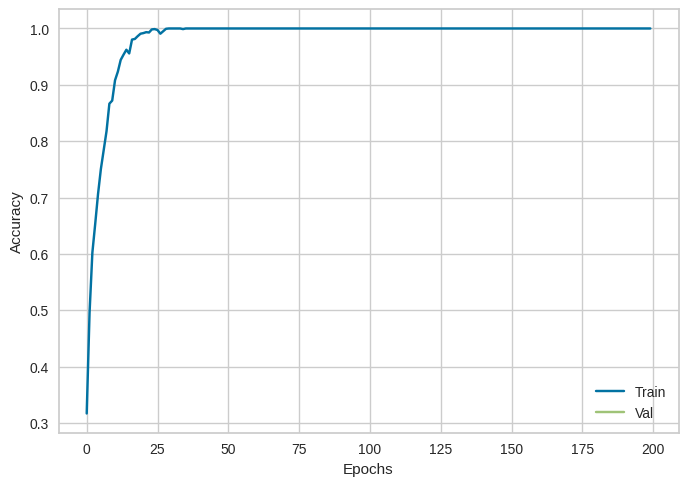

In [ ]:
history = clf7.history_
plt.plot(history['accuracy'], label='Train')
plt.plot(history['val_accuracy'], label='Val')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Questa serie di codice plotta la curva di accuratezza del modello durante l'addestramento (train) e la validazione (val) in funzione del numero di epoche. In particolare, history contiene le metriche (ad esempio l'accuratezza) raccolte durante l'addestramento del modello e, usando il metodo plot di matplotlib, queste metriche vengono visualizzate in un grafico con l'accuratezza sulle ordinate e il numero di epoche sulle ascisse. La curva dell'accuratezza di train viene rappresentata in blu, mentre quella di validation in arancione. In questo modo, si può verificare l'andamento dell'accuratezza in entrambe le fasi e individuare eventuali problemi di overfitting o underfitting.

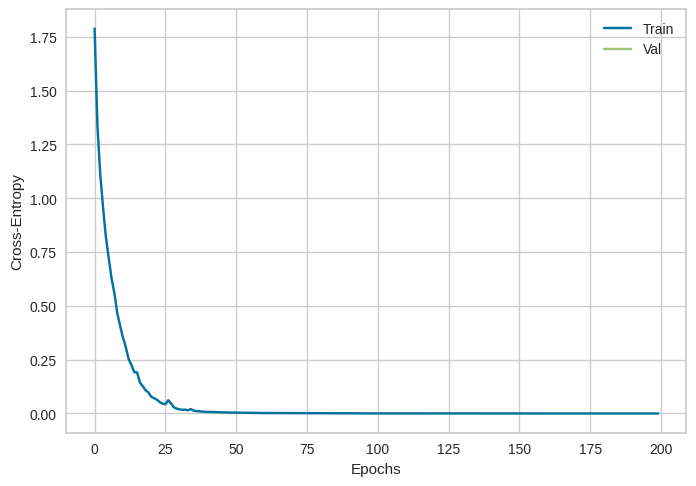

In [ ]:
plt.plot(history['loss'], label='Train')
plt.plot(history['val_loss'], label='Val')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy')
plt.legend()
plt.show()

Questo codice visualizza i grafici dell'andamento della funzione di loss (cross-entropy) e dell'accuratezza durante l'addestramento del modello con l'ottimizzazione dei parametri sui dati di training (Train) e sui dati di validation (Val).

La funzione di loss è un indicatore dell'errore del modello durante la fase di addestramento, mentre l'accuratezza è il rapporto tra le predizioni corrette e il totale delle predizioni effettuate dal modello.

Questi grafici possono aiutare a monitorare la fase di addestramento del modello, verificando se il modello sta apprendendo bene dai dati di training e se sta generalizzando correttamente ai dati di validation.

In [ ]:
y_pred = clf7.predict(X_test).astype(int)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

20/20 [==============================] - 0s 928us/step
Accuracy 0.4983974358974359
F1-score [0.6440678  0.55721393 0.49122807 0.49162011 0.42937853 0.35294118
 0.42051282 0.41025641]
              precision    recall  f1-score   support

           0       0.54      0.79      0.64        96
           1       0.53      0.58      0.56        96
           2       0.42      0.58      0.49        48
           3       0.53      0.46      0.49        96
           4       0.47      0.40      0.43        96
           5       0.60      0.25      0.35        48
           6       0.41      0.43      0.42        96
           7       0.53      0.33      0.41        48

    accuracy                           0.50       624
   macro avg       0.51      0.48      0.47       624
weighted avg       0.50      0.50      0.49       624



Il codice qui sopra sta facendo la previsione delle etichette di classe per il set di test X_test, utilizzando il classificatore clf addestrato precedentemente.

In particolare, la funzione predict restituisce un array di etichette di classe predette, che vengono poi convertite in numeri interi mediante il metodo astype(int).

Successivamente, vengono calcolate alcune metriche di valutazione delle prestazioni del modello, tra cui l'accuracy, l'F1-score e la classificazione report. L'accuracy rappresenta la frazione di campioni correttamente classificati, mentre l'F1-score è una media pesata tra la precision e la recall. Il classification report fornisce una serie di metriche di valutazione delle prestazioni per ogni classe di etichette.

In [ ]:
clf8 = KerasClassifier(build_fn=build_model)
#Il codice sta creando un oggetto "KerasClassifier" che utilizza una funzione "build_model" definita precedentemente per costruire un modello di rete neurale.
#L'oggetto creato può essere utilizzato per addestrare il modello sul dataset di training e per effettuare delle previsioni sul dataset di test

In [ ]:
clf8.fit(X_train, y_train, validation_split=0.2, epochs=1000)

Epoch 1/1000


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


46/46 [==============================] - 1s 5ms/step - loss: 1.8673 - accuracy: 0.2982 - val_loss: 1.7061 - val_accuracy: 0.3169
Epoch 2/1000
46/46 [==============================] - 0s 2ms/step - loss: 1.3776 - accuracy: 0.4877 - val_loss: 1.5392 - val_accuracy: 0.4235
Epoch 3/1000
46/46 [==============================] - 0s 2ms/step - loss: 1.1487 - accuracy: 0.5958 - val_loss: 1.5892 - val_accuracy: 0.4098
Epoch 4/1000
46/46 [==============================] - 0s 2ms/step - loss: 0.9643 - accuracy: 0.6628 - val_loss: 1.6424 - val_accuracy: 0.3934
Epoch 5/1000
46/46 [==============================] - 0s 2ms/step - loss: 0.8253 - accuracy: 0.7237 - val_loss: 1.8359 - val_accuracy: 0.3852
Epoch 6/1000
46/46 [==============================] - 0s 2ms/step - loss: 0.7042 - accuracy: 0.7832 - val_loss: 1.8446 - val_accuracy: 0.4044
Epoch 7/1000
46/46 [==============================] - 0s 2ms/step - loss: 0.6036 - accuracy: 0.8092 - val_loss: 1.9132 - val_accuracy: 0.4071
Epoch 8/1000
46/46 

KerasClassifier(
	model=None
	build_fn=<function build_model at 0x7ff66e74bac0>
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=1
	class_weight=None
)

Questa istruzione addestra il modello clf sui dati di addestramento X_train e y_train per 1000 epoche con una suddivisione del 20% dei dati di addestramento per la validazione. Ciò significa che il modello viene addestrato su 80% dei dati di addestramento e poi valutato sulla restante 20% per ogni epoca. Durante l'addestramento, il modello cerca di minimizzare la funzione di perdita e aggiornare i pesi dei suoi strati per migliorare la precisione delle previsioni sul set di addestramento. L'output di questa istruzione è un oggetto history contenente i valori della funzione di perdita e della precisione del modello durante l'addestramento e la validazione per ogni epoca.

In [ ]:
y_pred = clf8.predict(X_test).astype(int)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Questo codice utilizza il classificatore Keras precedentemente addestrato per fare delle previsioni sui dati di test X_test. Le previsioni vengono salvate in y_pred.

Successivamente, il codice stampa la precisione (accuracy), il punteggio F1 (F1-score) e una relazione di classificazione (classification report) per le previsioni fatte dal modello. La precisione rappresenta la percentuale di istanze correttamente classificate rispetto al numero totale di istanze nel set di test. Il punteggio F1 rappresenta la media armonica tra precisione e richiamo (recall) per ciascuna classe. Il report di classificazione fornisce ulteriori metriche di valutazione come precisione, richiamo e supporto per ciascuna classe.

In [ ]:
plt.plot(history['loss'], label='Train')
plt.plot(history['val_loss'], label='Val')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy')
plt.legend()
plt.show()

In [ ]:
plt.plot(history['accuracy'], label='Train')
plt.plot(history['val_accuracy'], label='Val')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy')
plt.legend()
plt.show()

#EARLY STOPPING

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

testo con model 1

In [ ]:
es = EarlyStopping(monitor='val_accuracy', patience=50, verbose=True)
mc = ModelCheckpoint('best_model_NOREG.h5', monitor='val_accuracy', save_best_only=True)

clf9 = KerasClassifier(build_model_1, callbacks=[es, mc])
history4 = model1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100,
                      batch_size=10, callbacks=[es,mc]).history

<ipython-input-36-129555fec7a8>:4: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  clf = KerasClassifier(build_model_1, callbacks=[es, mc])


NameError: ignored

In [ ]:
test_loss_4, test_acc_4 = clf9.evaluate(X_test, y_test)

print('Loss %f, Accuracy %f' % (test_loss_1, test_acc_1))
print('Loss %f, Accuracy %f' % (test_loss_2, test_acc_2))
print('Loss %f, Accuracy %f' % (test_loss_3, test_acc_3))
print('Loss %f, Accuracy %f' % (test_loss_4, test_acc_4))

AttributeError: ignored

In questo codice, stiamo definendo una nuova istanza di EarlyStopping e una di ModelCheckpoint, due callbacks di Keras che verranno utilizzati durante l'addestramento del modello.

L'istanza di EarlyStopping viene utilizzata per interrompere l'addestramento quando la metrica monitorata (in questo caso "val_accuracy", l'accuratezza sul set di validazione) smette di migliorare per un certo numero di epoche consecutive (in questo caso 50), in modo da evitare di continuare ad addestrare un modello che sta iniziando a overfitting.

L'istanza di ModelCheckpoint viene utilizzata per salvare il modello con la migliore accuratezza sul set di validazione durante l'addestramento (in questo caso nel file "best_model_NOREG.h5"), in modo da poterlo poi utilizzare per fare previsioni su nuovi dati.

Infine, stiamo definendo un nuovo classificatore Keras, che utilizza la funzione build_model definita in precedenza e viene configurato per utilizzare le callbacks EarlyStopping e ModelCheckpoint.

In [ ]:
clf9.fit(X_train, y_train, validation_split=0.2, epochs=500)

In [ ]:
y_pred = clf9.predict(X_test).astype(int)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

##L2 REGULARIZATION

In [ ]:
from keras.regularizers import l2, l1

def build_L2_model():
    model = Sequential()


    n_feature = X_train.shape[1]
    model.add(Dense(7, activation='relu', input_shape=(n_feature,), kernel_regularizer=l2(0.01)))
    model.add(Dense(5, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dense(3, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dense(1, activation='sigmoid', kernel_regularizer=l2(0.01)))


    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['F1'])

    return model

La funzione build_L2_model() definisce un modello di rete neurale artificiale con regolarizzazione L2 (Ridge Regression) per evitare l'overfitting. In questo modello, ci sono quattro strati nascosti, ciascuno con 100 nodi con funzione di attivazione ReLU. Viene anche aggiunto un layer di output con un numero di nodi uguale al numero di classi da predire. La funzione di attivazione del layer di output è l'identità.

La regolarizzazione L2 viene applicata al primo strato nascosto utilizzando il parametro kernel_regularizer che viene impostato su l2(0.001). Ciò significa che viene aggiunto un termine di regolarizzazione L2 alla funzione di perdita della rete, con un fattore di regolarizzazione di 0.001, che punisce i pesi elevati nella funzione di perdita, in modo che il modello appreso da dati di addestramento generalizzi meglio su nuovi dati di test.

In [ ]:
mc = ModelCheckpoint('best_model_L2.h5', monitor='val_accuracy', save_best_only=True)

L2_model = KerasClassifier(build_L2_model, callbacks=[es,mc])
L2_model.fit(X_train, y_train, validation_split=0.2, epochs=500)

Epoch 1/500


<ipython-input-47-0858c7534878>:3: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  L2_model = KerasClassifier(build_L2_model, callbacks=[es,mc])


ValueError: ignored

Questo codice addestra un modello di rete neurale con una regolarizzazione L2. La regolarizzazione L2 è una tecnica di regolarizzazione che consiste nell'aggiungere un termine di penalità alla funzione di perdita del modello. In questo caso, viene definito un modello che utilizza la regolarizzazione L2 con un valore di regolarizzazione pari a 0.001.

Viene poi creato un oggetto ModelCheckpoint che salverà solo il modello con la migliore accuratezza sulla validation set. Successivamente, il modello viene creato utilizzando il costruttore KerasClassifier, che avvolge il modello definito in build_L2_model in un oggetto scikit-learn compatibile. Infine, il modello viene addestrato utilizzando i dati di addestramento e di validation forniti da X_train e y_train con una suddivisione del 20% dei dati di addestramento utilizzati come validation set. Viene usata una EarlyStopping per fermare l'addestramento del modello quando la performance del modello smette di migliorare.

In [ ]:
history = L2_model.history_
plt.plot(history['loss'], label='Train')
plt.plot(history['val_loss'], label='Val')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy')
plt.legend()
plt.show()

AttributeError: ignored

Il codice sopra plotta la curva di training e di validation della cross-entropy in base alle epoche durante l'addestramento della rete neurale con regolarizzazione L2. La funzione plt.plot() viene utilizzata per tracciare i valori della perdita di addestramento e di validazione nel corso delle epoche sull'asse y, mentre l'asse x rappresenta il numero di epoche. La funzione plt.xlabel() e plt.ylabel() vengono utilizzate per aggiungere le etichette degli assi x e y rispettivamente. Infine, la funzione plt.legend() viene utilizzata per mostrare una legenda che differenzia le curve di addestramento e validazione.

In [ ]:
plt.plot(history['accuracy'], label='Train')
plt.plot(history['val_accuracy'], label='Val')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

##DROP OUT

Il dropout è una tecnica di regolarizzazione utilizzata durante l'addestramento di reti neurali. Durante il dropout, alcune unità di output (cioè neuroni) sono casualmente escluse dal processo di apprendimento in modo da ridurre l'overfitting. In pratica, durante l'addestramento, ogni volta che viene eseguita una propagazione in avanti attraverso la rete, alcuni neuroni vengono selezionati casualmente e temporaneamente "disattivati" (ovvero impostati a zero) con una certa probabilità. Questa tecnica aumenta la robustezza e la generalizzazione della rete neurale, impedendole di concentrarsi troppo sui singoli esempi di addestramento e di imparare in modo più generale i pattern dei dati di addestramento.

In [ ]:
from keras.layers import Dropout

def build_DROPOUT_model():
    # define the model
    model = Sequential()

    n_feature = X_train.shape[1]
    h_dim=100
    model.add(Dense(7, activation='relu', input_shape=(n_feature,)))
    model.add(Dropout(0.2))
    model.add(Dense(5, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(3, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))

    #compile the model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['F1'])

    return model

Questo codice definisce una nuova architettura di rete neurale che utilizza anche la regolarizzazione Dropout.
La funzione build_DROPOUT_model() definisce il modello sequenziale con una serie di strati Dense con attivazione 'relu', a cui segue uno strato Dropout.
In questo caso, lo strato Dropout viene aggiunto dopo il terzo strato Dense con l'obiettivo di ridurre l'overfitting.
Infine, viene definito uno strato Dense di uscita con attivazione lineare e viene compilato il modello con la funzione di loss 'sparse_categorical_crossentropy' e l'ottimizzatore 'adam'.

h_dim è il numero di unità (neuroni) nella hidden layer.

activation='relu' indica che la funzione di attivazione utilizzata per questa layer è la ReLU.

input_shape=(n_feature,) indica la forma dell'input (ovvero il numero di features) che viene dato in input alla prima hidden layer. In questo caso, (n_feature,) indica che l'input è un vettore di n_feature features.

In [ ]:
mc = ModelCheckpoint('best_model_DROPOUT.h5', monitor='val_accuracy', save_best_only=True)

DROPOUT_model = KerasClassifier(build_DROPOUT_model, callbacks=[es,mc])
DROPOUT_model.fit(X_train, y_train, validation_split=0.2, epochs=500)

Epoch 1/500


<ipython-input-50-9daf620c6ca8>:3: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  DROPOUT_model = KerasClassifier(build_DROPOUT_model, callbacks=[es,mc])
/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1176: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


ValueError: ignored

In [ ]:
mc = ModelCheckpoint('best_model_DROPOUT.h5', monitor='val_loss', save_best_only=True)

DROPOUT_model = build_DROPOUT_model()
h_DROPOUT = DROPOUT_model.fit(X_train, y_train, validation_data=(X_val, y_val),
                              epochs=1000, batch_size=10, callbacks=[es,mc]).history

                #MODELLO DI CAVALIERI

NameError: ignored

In [ ]:
print('Loss %f, Accuracy %f' % (loss_NOREG, acc_NOREG))
print('Loss %f, Accuracy %f' % (loss_L2, acc_L2))
print('Loss %f, Accuracy %f' % (loss_DROPOUT, acc_DROPOUT))

    #MODELLO DI CAVALIERI

NameError: ignored

In questo codice si sta costruendo una nuova architettura di rete neurale chiamata "DROPOUT_model". La principale differenza rispetto alle reti neurali precedenti è l'utilizzo del layer di Dropout, che ha lo scopo di ridurre l'overfitting della rete.

In particolare, la funzione "build_DROPOUT_model" costruisce la rete neurale aggiungendo un layer di Dropout dopo il terzo layer completamente connesso, con un tasso di dropout del 10%. Il resto della rete neurale è simile a quella costruita in precedenza, con tre layer completamente connessi di 100 unità ciascuno.

In seguito, si utilizza la classe "KerasClassifier" per creare un'istanza del modello appena costruito. Si utilizzano gli stessi callback utilizzati in precedenza, vale a dire "EarlyStopping" e "ModelCheckpoint", per monitorare l'accuratezza del modello sulla validation set e salvare solo il modello che fornisce la migliore accuratezza sul validation set.

Infine, si addestra il modello utilizzando il metodo "fit" sulla porzione di training set, specificando una validation split del 20% e un massimo di 500 epoche.

In [ ]:
history = DROPOUT_model.history_
plt.plot(history['loss'], label='Train')
plt.plot(history['val_loss'], label='Val')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy')
plt.legend()
plt.show()

AttributeError: ignored

In [ ]:
plt.plot(history['accuracy'], label='Train')
plt.plot(history['val_accuracy'], label='Val')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

##MODEL COMPARISON

In [ ]:
# laod best models and test them
from keras.models import load_model

best_NOREG_model = load_model('best_model_NOREG.h5')
best_L2_model = load_model('best_model_L2.h5')
best_DROPOUT_model = load_model('best_model_DROPOUT.h5')

loss_NOREG, acc_NOREG = best_NOREG_model.evaluate(X_test, y_test)
loss_L2, acc_L2 = best_L2_model.evaluate(X_test, y_test)
loss_DROPOUT, acc_DROPOUT = best_DROPOUT_model.evaluate(X_test, y_test)

Certo, ecco una spiegazione riga per riga del codice:

1. Viene importata la funzione `load_model` dal modulo `models` di Keras.
2. Viene caricato il modello migliore ottenuto senza l'utilizzo di regolarizzazione l2 e salvato come file `best_model_NOREG.h5`.
3. Viene caricato il modello migliore ottenuto con l'utilizzo di regolarizzazione l2 e salvato come file `best_model_L2.h5`.
4. Viene caricato il modello migliore ottenuto con l'utilizzo di dropout e salvato come file `best_model_DROPOUT.h5`.
5. Vengono calcolati i valori di loss e accuracy per il modello `best_NOREG_model` usando il metodo `evaluate` con i dati di test `X_test` e `y_test`.
6. Vengono calcolati i valori di loss e accuracy per il modello `best_L2_model` usando il metodo `evaluate` con i dati di test `X_test` e `y_test`.
7. Vengono calcolati i valori di loss e accuracy per il modello `best_DROPOUT_model` usando il metodo `evaluate` con i dati di test `X_test` e `y_test`.

In sostanza, questo codice serve per valutare le prestazioni dei tre modelli migliori ottenuti durante il training: il modello senza regolarizzazione, il modello con regolarizzazione L2 e il modello con dropout. In particolare, viene valutata l'accuratezza (accuracy) e la perdita (loss) di ciascuno di questi modelli sui dati di test, che rappresentano dati mai visti durante il training e quindi servono per valutare la capacità di generalizzazione dei modelli.

In [ ]:
print('Loss %f, Accuracy %f' % (loss_NOREG, acc_NOREG))
print('Loss %f, Accuracy %f' % (loss_L2, acc_L2))
print('Loss %f, Accuracy %f' % (loss_DROPOUT, acc_DROPOUT))

#HYPER-PARAMETER TUNING

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
def build_model(meta, hidden_layer_sizes, activation):
    n_features_in_ = meta["n_features_in_"]
    n_classes_ = meta["n_classes_"]
    model = keras.models.Sequential()
    model.add(keras.layers.Input(shape=(n_features_in_,)))
    for hidden_layer_size in hidden_layer_sizes:
        model.add(keras.layers.Dense(hidden_layer_size, activation=activation))
    model.add(keras.layers.Dense(n_classes_, activation="softmax"))
    return model

Certo, ecco una spiegazione riga per riga del codice:

- `def build_model(meta, hidden_layer_sizes, activation):` Inizia la definizione di una funzione chiamata `build_model`, che ha tre parametri di input: `meta`, `hidden_layer_sizes`, e `activation`.

- `n_features_in_ = meta["n_features_in_"]` Questa riga estrae il valore `n_features_in_` dal dizionario `meta` che è stato passato come input alla funzione e lo assegna alla variabile `n_features_in_`.

- `n_classes_ = meta["n_classes_"]` Questa riga estrae il valore `n_classes_` dal dizionario `meta` che è stato passato come input alla funzione e lo assegna alla variabile `n_classes_`.

- `model = keras.models.Sequential()` Questa riga crea un oggetto `Sequential` di Keras, che rappresenta un modello di rete neurale sequenziale.

- `model.add(keras.layers.Input(shape=(n_features_in_,)))` Questa riga aggiunge un layer di input alla rete neurale con il numero di input corrispondente a `n_features_in_`.

- `for hidden_layer_size in hidden_layer_sizes:` Questa riga inizia un ciclo `for` che scorre tutti gli elementi della lista `hidden_layer_sizes` che è stata passata come parametro di input.

- `model.add(keras.layers.Dense(hidden_layer_size, activation=activation))` Questa riga aggiunge un layer denso alla rete neurale con il numero di neuroni specificato dal parametro `hidden_layer_size` e la funzione di attivazione specificata dal parametro `activation`.

- `model.add(keras.layers.Dense(n_classes_, activation="softmax"))` Questa riga aggiunge un ultimo layer denso alla rete neurale con il numero di neuroni corrispondente al numero di classi e una funzione di attivazione softmax, che produce una distribuzione di probabilità sulle classi.

- `return model` Questa riga termina la definizione della funzione e restituisce l'oggetto `Sequential` creato all'inizio della funzione.

`hidden_layer_sizes` indica l'elenco delle dimensioni dei livelli nascosti del modello, mentre `activation` specifica la funzione di attivazione da utilizzare in ogni livello nascosto.

Nel codice, l'elenco delle dimensioni dei livelli nascosti viene utilizzato in un ciclo `for` per aggiungere i livelli nascosti al modello, mentre la funzione di attivazione viene specificata come parametro per ogni livello nascosto.

In sostanza, `hidden_layer_sizes` e `activation` sono iperparametri del modello che possono essere regolati per ottimizzare le prestazioni del modello durante la fase di addestramento.

In [ ]:
clf10= KerasClassifier(
    model=build_model,
    loss="sparse_categorical_crossentropy",
    verbose=False
)

In [ ]:
%%time
params = {
    'optimizer__learning_rate': [0.001, 0.01, 0.1, 1],
    'model__hidden_layer_sizes': [(100, 100, 100), (50, 50, 50), (10, 10, 10),
                                  (100, 50, 10), (10, 10, 10), (10, 10)],
    'model__activation': ['relu', 'tanh'],
    'optimizer': ["adam", "sgd"],
    'epochs': [10, 50, 100, 200]
}

gs = RandomizedSearchCV(clf10, params, scoring='accuracy', n_jobs=-1, verbose=True, n_iter=15, cv=3)

In questo codice stiamo definendo i parametri da utilizzare nella RandomizedSearchCV. In particolare:

- `optimizer__learning_rate`: definisce una lista di valori di learning rate da testare per l'ottimizzatore;
- `model__hidden_layer_sizes`: definisce una lista di tuple che rappresentano il numero di neuroni in ciascun strato nascosto della rete neurale;
- `model__activation`: definisce una lista di funzioni di attivazione da testare;
- `optimizer`: definisce una lista di ottimizzatori da testare;
- `epochs`: definisce una lista di valori per il numero di epoche da utilizzare.

Infine, viene creata una RandomizedSearchCV con i seguenti parametri:

- `clf`: rappresenta l'oggetto KerasClassifier che abbiamo definito in precedenza;
- `params`: rappresenta la lista di parametri da testare;
- `scoring`: definisce la metrica di valutazione da utilizzare per scegliere il miglior modello;
- `n_jobs`: definisce il numero di processi da utilizzare in parallelo (-1 significa utilizzare tutti i processori disponibili);
- `verbose`: definisce il livello di dettaglio degli output durante l'esecuzione della ricerca;
- `n_iter`: definisce il numero di combinazioni di parametri da testare;
- `cv`: definisce la strategia di cross-validation da utilizzare durante la ricerca.

In [ ]:
%%time
gs.fit(X_train, y_train)

print(gs.best_score_, gs.best_params_)

Il codice sopra esegue una ricerca casuale per trovare i migliori iperparametri per un modello di apprendimento automatico. La ricerca casuale viene effettuata su una griglia di possibili combinazioni di iperparametri definiti nel dizionario `params`.

La funzione `RandomizedSearchCV` effettua la ricerca casuale su questa griglia per un numero di iterazioni specificato dalla variabile `n_iter`. Per ogni combinazione di iperparametri, il modello viene addestrato utilizzando la funzione `fit` sulla porzione di training del set di dati.

La combinazione di iperparametri che restituisce il punteggio più alto sulla metrica specificata in `scoring` viene selezionata come la migliore combinazione di iperparametri. Il punteggio migliore e i parametri migliori vengono quindi stampati a schermo.

In [ ]:
y_pred = gs.predict(X_test).astype(int)
#Questa riga di codice usa il modello addestrato gs per fare delle previsioni sul set di
#dati di test X_test e assegna le previsioni alla variabile y_pred. Inoltre, il metodo astype(int)
#converte i risultati delle previsioni in numeri interi. Questo è importante perché il tipo di dati
#della variabile y_test (che contiene le vere etichette delle classi) è probabilmente intero, quindi
#i risultati delle previsioni devono essere coerenti con quel tipo di dati per poter confrontare le
#previsioni con le etichette reali.
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
def build_model():

    n_feature = X_train.shape[1]
    model = Sequential()
    model.add(Dense(7, input_dim=n_feature, activation='relu'))
    model.add(Dense(5, activation='relu'))
    model.add(Dense(3, activation='relu'))
    model.add(Dense(1,activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [ ]:
model7 = build_model()

history1 = model7.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=10).history


Epoch 1/50
183/183 [==============================] - 2s 4ms/step - loss: -8.1413 - accuracy: 0.1526 - val_loss: -37.4963 - val_accuracy: 0.1538
Epoch 2/50
183/183 [==============================] - 0s 3ms/step - loss: -105.0206 - accuracy: 0.1532 - val_loss: -370.3535 - val_accuracy: 0.1538
Epoch 3/50
183/183 [==============================] - 1s 4ms/step - loss: -659.7632 - accuracy: 0.1532 - val_loss: -1824.6887 - val_accuracy: 0.1538
Epoch 4/50
183/183 [==============================] - 1s 3ms/step - loss: -2446.7393 - accuracy: 0.1532 - val_loss: -5748.9707 - val_accuracy: 0.1538
Epoch 5/50
183/183 [==============================] - 1s 4ms/step - loss: -6693.4219 - accuracy: 0.1532 - val_loss: -14237.5020 - val_accuracy: 0.1538
Epoch 6/50
183/183 [==============================] - 1s 3ms/step - loss: -14862.9365 - accuracy: 0.1532 - val_loss: -29272.8359 - val_accuracy: 0.1538
Epoch 7/50
183/183 [==============================] - 1s 3ms/step - loss: -28500.1426 - accuracy: 0.1532 

In [ ]:
model8 = build_model()

history2 = model8.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=50, batch_size=50).history


Epoch 1/50
37/37 [==============================] - 2s 14ms/step - loss: -0.0611 - accuracy: 0.1537 - val_loss: -0.8745 - val_accuracy: 0.1538
Epoch 2/50
37/37 [==============================] - 0s 6ms/step - loss: -2.6279 - accuracy: 0.1532 - val_loss: -6.0071 - val_accuracy: 0.1538
Epoch 3/50
37/37 [==============================] - 0s 4ms/step - loss: -7.8506 - accuracy: 0.1532 - val_loss: -16.2489 - val_accuracy: 0.1538
Epoch 4/50
37/37 [==============================] - 0s 3ms/step - loss: -17.4295 - accuracy: 0.1532 - val_loss: -34.7563 - val_accuracy: 0.1538
Epoch 5/50
37/37 [==============================] - 0s 4ms/step - loss: -34.3831 - accuracy: 0.1532 - val_loss: -66.9796 - val_accuracy: 0.1538
Epoch 6/50
37/37 [==============================] - 0s 4ms/step - loss: -62.9914 - accuracy: 0.1532 - val_loss: -118.2594 - val_accuracy: 0.1538
Epoch 7/50
37/37 [==============================] - 0s 3ms/step - loss: -107.7096 - accuracy: 0.1532 - val_loss: -195.4527 - val_accuracy: 

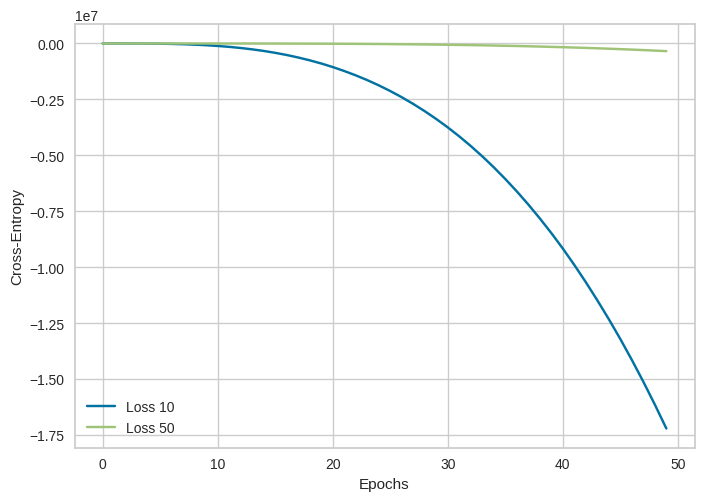

In [ ]:
plt.plot(history1['loss'], label='Loss 10')
plt.plot(history2['loss'], label='Loss 50')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy')
plt.legend()
plt.show()

In [ ]:

test_loss_1, test_acc_1 = model7.evaluate(X_test, y_test)
test_loss_2, test_acc_2 = model8.evaluate(X_test, y_test)

print('Loss %f, Accuracy %f' % (test_loss_1, test_acc_1))
print('Loss %f, Accuracy %f' % (test_loss_2, test_acc_2))

ValueError: ignored

In [ ]:
y_pred = model8.predict(X_test).astype(int)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

20/20 [==============================] - 0s 2ms/step
Accuracy 0.15384615384615385
F1-score [0.         0.26666667 0.         0.         0.         0.
 0.         0.        ]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        96
           1       0.15      1.00      0.27        96
           2       0.00      0.00      0.00        48
           3       0.00      0.00      0.00        96
           4       0.00      0.00      0.00        96
           5       0.00      0.00      0.00        48
           6       0.00      0.00      0.00        96
           7       0.00      0.00      0.00        48

    accuracy                           0.15       624
   macro avg       0.02      0.12      0.03       624
weighted avg       0.02      0.15      0.04       624



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


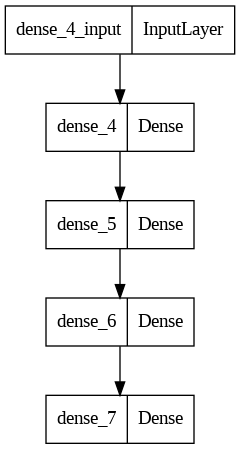

In [ ]:
import pydot
from keras.utils import plot_model
plot_model(model1)

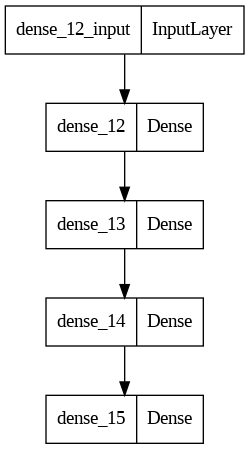

In [ ]:
plot_model(model8)


In [ ]:

model9 = build_model()

history3 = model9.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=10).history

Epoch 1/100
183/183 [==============================] - 3s 9ms/step - loss: 0.5039 - accuracy: 0.1499 - val_loss: -1.6124 - val_accuracy: 0.1571
Epoch 2/100
183/183 [==============================] - 2s 11ms/step - loss: -16.3072 - accuracy: 0.1532 - val_loss: -105.1977 - val_accuracy: 0.1538
Epoch 3/100
183/183 [==============================] - 1s 3ms/step - loss: -356.3385 - accuracy: 0.1532 - val_loss: -1343.2646 - val_accuracy: 0.1538
Epoch 4/100
183/183 [==============================] - 1s 3ms/step - loss: -2153.5842 - accuracy: 0.1532 - val_loss: -5785.9839 - val_accuracy: 0.1538
Epoch 5/100
183/183 [==============================] - 0s 2ms/step - loss: -6886.2925 - accuracy: 0.1532 - val_loss: -15557.1299 - val_accuracy: 0.1538
Epoch 6/100
183/183 [==============================] - 1s 3ms/step - loss: -16231.6260 - accuracy: 0.1532 - val_loss: -33148.8398 - val_accuracy: 0.1538
Epoch 7/100
183/183 [==============================] - 0s 3ms/step - loss: -31986.3398 - accuracy: 0.

In [ ]:
print('Train: Loss %f, Accuracy %f' % (history1['loss'][49], history1['accuracy'][49]))
print('Val: Loss %f, Accuracy %f' % (history1['val_loss'][49], history1['val_accuracy'][49]))

Train: Loss -17211282.000000, Accuracy 0.191466
Val: Loss -25419514.000000, Accuracy 0.174679


In [ ]:
print('Train: Loss %f, Accuracy %f' % (history2['loss'][49], history2['accuracy'][49]))
print('Val: Loss %f, Accuracy %f' % (history2['val_loss'][49], history2['val_accuracy'][49]))

Train: Loss -342285.656250, Accuracy 0.153173
Val: Loss -448431.656250, Accuracy 0.153846


In [ ]:
print('Train: Loss %f, Accuracy %f' % (history3['loss'][99], history3['accuracy'][99]))
print('Val: Loss %f, Accuracy %f' % (history3['val_loss'][99], history3['val_accuracy'][99]))

Train: Loss -332320288.000000, Accuracy 0.153173
Val: Loss -454262720.000000, Accuracy 0.153846


20/20 [==============================] - 0s 1ms/step - loss: -454262720.0000 - accuracy: 0.1538
Loss -25419518.000000, Accuracy 0.174679
Loss 0.271255, Accuracy 0.171474
Loss -454262720.000000, Accuracy 0.153846


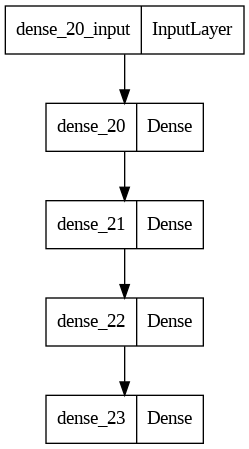

In [ ]:
test_loss_3, test_acc_3 = model9.evaluate(X_test, y_test)

print('Loss %f, Accuracy %f' % (test_loss_1, test_acc_1))
print('Loss %f, Accuracy %f' % (test_loss_2, test_acc_2))
print('Loss %f, Accuracy %f' % (test_loss_3, test_acc_3))
plot_model(model9)

In [ ]:
test_loss_3, test_acc_3 = model9.evaluate(X_test, y_test)


20/20 [==============================] - 0s 3ms/step - loss: -454262720.0000 - accuracy: 0.1538


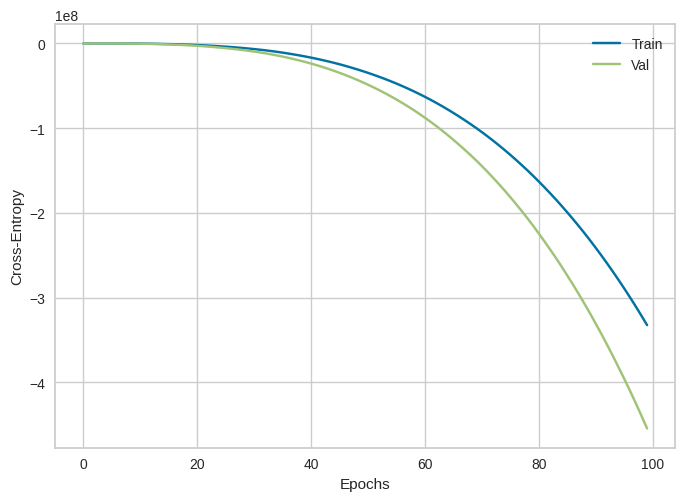

In [ ]:
plt.plot(history3['loss'], label='Train')
plt.plot(history3['val_loss'], label='Val')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy')
plt.legend()
plt.show()

In [ ]:

scores = cross_val_score(model9, X_train, y_train, cv=10)
print('Accuracy: %0.4f (+/- %0.3f)' % (scores.mean(), scores.std()))

scores = cross_val_score(model9, X_train, y_train, cv=10, scoring='f1_macro')
print('F1-score: %0.4f (+/- %0.3f)' % (scores.mean(), scores.std()))

TypeError: ignored

In [ ]:
from ann_visualizer.visualize import ann_viz;
#Build your model here
ann_viz(model9,view=True, filename="net.gv")

ModuleNotFoundError: ignored